# Install libraries

In [ ]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.6 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=aa5b26da3fa4fbfa719a85393a702b60eaa5b7acad7b475e5d3b861c435171dc
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=84f47b4cfcfa0437ad4f9ebc1ceb092c0b80623403d610d8fa2cb75f611fc720
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found existi

# 1. Data Preparation and EDA

## 1.1 EDA

In [ ]:
# Ticker List
tickers_list = ['ABBV','HCA', 'MOH', 'THC', 'GILD', 'HSIC', 'ISRG', 'JNJ', 'LH', 'PFE',
    'AES', 'LNT', 'AEP', 'AWK', 'EXC', 'EIX', 'DTE', 'CMS', 'NEE', 'DUK',
    'VZ', 'T', 'IPG', 'PARA', 'OMC', 'CMCSA', 'NFLX', 'DIS', 'EA', 'NWSA']

# pulling data from yahoo finance
eda = {ticker : si.get_data(ticker,start_date = '1/1/2017',end_date='12/31/2022',interval='1d') for ticker in tickers_list}

In [ ]:
# Seeing open prices for our stocks
prep_data = pd.DataFrame(eda[tickers_list[0]]['open']).rename(columns = {"open":tickers_list[0]})

# combining into one dataframe
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(eda[i]['open'])
prep_data

ABBV         HCA         MOH        THC       GILD  \
2017-01-03   62.919998   74.360001   54.250000  14.980000  72.339996   
2017-01-04   62.639999   75.129997   54.580002  16.299999  74.529999   
2017-01-05   63.380001   76.720001   55.520000  16.600000  76.839996   
2017-01-06   63.880001   76.660004   56.480000  16.600000  76.449997   
2017-01-09   63.799999   76.040001   56.880001  16.379999  75.930000   
...                ...         ...         ...        ...        ...   
2022-12-23  163.389999  240.339996  334.390015  46.700001  85.220001   
2022-12-27  163.490005  240.850006  336.329987  46.750000  85.250000   
2022-12-28  163.699997  240.729996  334.299988  47.509998  85.400002   
2022-12-29  162.960007  238.259995  334.880005  46.930000  84.910004   
2022-12-30  162.229996  238.809998  331.410004  47.520000  85.330002   

                 HSIC        ISRG         JNJ          LH        PFE  ...  \
2017-01-03  60.486275   70.660004  115.779999  110.970787  31.024668  ...   
2017-01-04  61.325489   70.888885  115.500000  111.297249  31.432638  ...   
2017-01-05  61.286274   70.021111  116.000000  111.400345  31.660341  ...   
2017-01-06  61.066666   70.444443  116.669998  110.816154  31.935484  ...   
2017-01-09  61.231373   70.576668  116.349998  111.202751  31.717268  ...   
...               ...         ...         ...         ...        ...  ...   
2022-12-23  80.269997  261.920013  176.669998  198.668381  51.560001  ...   
2022-12-27  80.550003  262.760010  178.110001  198.814438  51.860001  ...   
2022-12-28  80.870003  262.940002  177.759995  200.867691  51.049999  ...   
2022-12-29  79.629997  263.239990  177.550003  199.948456  51.020000  ...   
2022-12-30  80.150002  265.309998  177.490005  201.640900  51.290001  ...   

                   VZ          T        IPG       PARA        OMC      CMCSA  \
2017-01-03  53.959999  32.243202  23.650000  65.410004  85.910004  34.834999   
2017-01-04  54.549999  32.432022  23.610001  64.660004  85.540001  34.755001   
2017-01-05  54.779999  32.364048  23.190001  65.669998  85.400002  34.794998   
2017-01-06  53.669998  31.706949  23.200001  65.500000  85.290001  35.105000   
2017-01-09  53.220001  31.185801  23.580000  64.129997  85.639999  35.070000   
...               ...        ...        ...        ...        ...        ...   
2022-12-23  38.310001  18.170000  32.790001  16.610001  78.779999  34.779999   
2022-12-27  38.490002  18.250000  33.259998  16.459999  80.510002  35.110001   
2022-12-28  39.189999  18.450001  33.520000  16.360001  81.410004  35.099998   
2022-12-29  38.900002  18.270000  33.160000  16.350000  81.160004  34.810001   
2022-12-30  39.310001  18.420000  33.279999  16.510000  80.910004  34.810001   

                  NFLX         DIS          EA       NWSA  
2017-01-03  124.959999  105.300003   79.519997  11.550000  
2017-01-04  127.489998  106.639999   79.389999  11.700000  
2017-01-05  129.220001  107.169998   79.980003  11.870000  
2017-01-06  132.080002  108.019997   79.110001  11.880000  
2017-01-09  131.479996  108.580002   79.190002  11.900000  
...                ...         ...         ...        ...  
2022-12-23  296.179993   86.059998  121.019997  18.180000  
2022-12-27  293.190002   87.419998  121.320000  18.309999  
2022-12-28  281.920013   86.080002  120.900002  18.250000  
2022-12-29  283.179993   85.250000  120.120003  18.030001  
2022-12-30  285.529999   85.730003  121.779999  18.030001  

[1510 rows x 30 columns]

In [ ]:
# Checking for null values
prep_data.isna().sum().sum() # No Null values for the time frame of this project

0

## 1.2 Sector Plots


Sector: Healthcare



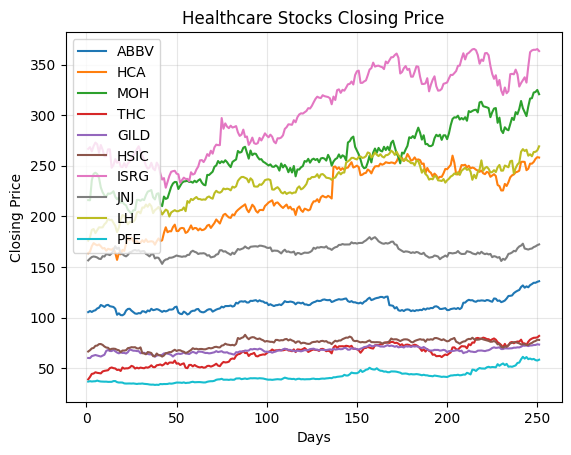


Sector: Utilities



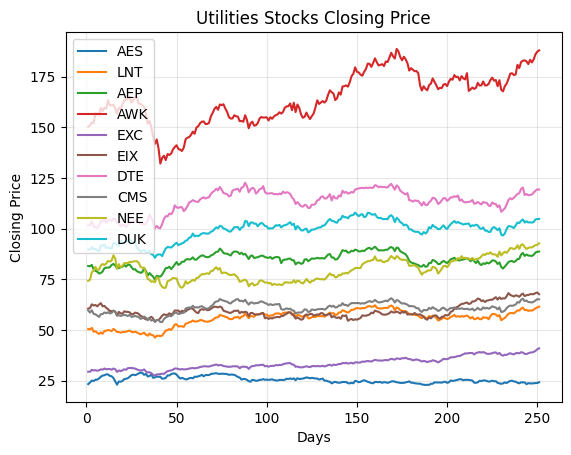


Sector: Communications



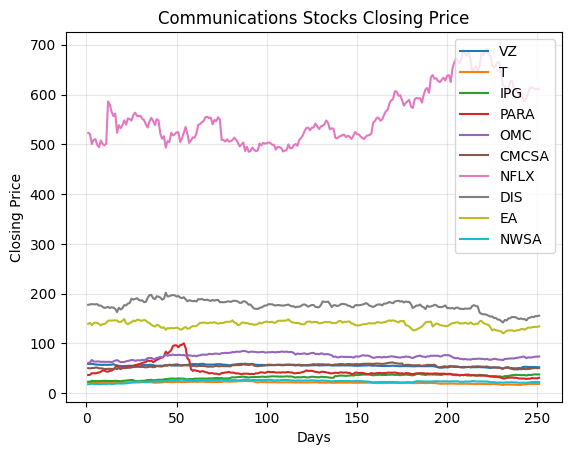

In [ ]:
# Function for Sector Plots
def analyze_stocks_by_sector(sector_stocks, start_date, end_date):


    # Splitting sections by sector
    for sector, stocks in sector_stocks.items():
        print("\n============================")
        print("Sector:", sector)
        print("============================\n")
        # Loop to pull necessary stock information
        for ticker in stocks:
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')
            day = np.arange(1, len(stock_data) + 1)
            stock_data['Day'] = day
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            plt.plot(stock_data['Day'], stock_data['Close'], label=ticker)

        plt.title('{} Stocks Closing Price'.format(sector))
        plt.xlabel('Days')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.grid(True, alpha=.3)
        plt.show()

# Defining sectors and stocks within each sector
sector_stocks = {
    'Healthcare': ['ABBV','HCA', 'MOH', 'THC', 'GILD', 'HSIC', 'ISRG', 'JNJ', 'LH', 'PFE'],
    'Utilities': ['AES', 'LNT', 'AEP', 'AWK', 'EXC', 'EIX', 'DTE', 'CMS', 'NEE', 'DUK'],
    'Communications': ['VZ', 'T', 'IPG', 'PARA', 'OMC', 'CMCSA', 'NFLX', 'DIS', 'EA', 'NWSA']
}

# Using our function for the given timeframe
start_date = '2021-01-01'
end_date = '2021-12-31'

analyze_stocks_by_sector(sector_stocks, start_date, end_date)


## 1.3 Discuss Visualization

**Healthcare Sector**
* **Synchronized movements**: Observing multiple stocks within a sector exhibiting simultaneous rises or falls, particularly at specific junctures—like the observed drop around the 800-day mark—suggests a strong correlation. This collective movement implies that these stocks might share common underlying factors influencing their prices.

* **Stability vs. Volatility**: Comparing the behavior of stocks within a sector reveals distinct characteristics. For instance, ABBV demonstrates noticeable fluctuations, suggesting a more volatile pattern, while ISRG showcases a gradual, consistent upward trend. This disparity in their price movements signifies varying levels of stability and volatility among individual stocks within the sector.

* **Market dynamics**: The divergent performance seen in healthcare stocks like GILD and JNJ underscores the varied strategies, market positions, or external influences shaping each company's trajectory. These disparities highlight the importance of analyzing individual stock behaviors within the broader sector context.

**Utilities Sector**
* **Steady growth of established utilities**: Established utility stocks such as AEP demonstrate consistent and relatively stable growth patterns, indicating lower volatility within the sector. Conversely, stocks like AES display more pronounced fluctuations, signaling higher volatility and potentially greater market risk within the utilities industry.
* **Market response to regulatory changes**: During periods of regulatory alterations or shifts in energy policies, utility stocks might exhibit increased volatility. Companies with stable trajectories, like AEP, might respond differently compared to those with higher fluctuations, such as AES, reflecting varying resilience or vulnerability to regulatory changes.
* **Diverse trajectories reflect sector dynamics**: The contrasting behaviors of stocks like NEE and AES exemplify the diverse dynamics present within the utility sector. These variations may stem from company-specific strategies, market positions, or external factors impacting their performance uniquely.



**Communications Sector**
* **Tech dominance and stability**: Stocks like NFLX exhibit consistent, tech-driven growth, highlighting market dominance and a relatively stable trajectory over time. Contrastingly, traditional communication companies such as VZ present steadier yet more conservative trends, focusing on stability and established market positions.
* **Tech's response to market events**: During specific periods, such as major content releases or earnings reports, tech-oriented communication stocks tend to showcase pronounced price movements. These movements could signify market reactions to crucial events, influencing investor sentiment and driving volatility within the sector.
* **Diverse growth patterns reflect strategies**: Divergent growth trajectories among tech-driven companies like NFLX emphasize different market strategies or reactions to industry shifts. This diversity illustrates the multifaceted nature of the tech-oriented communication sector, highlighting the varying responses to market conditions and innovation strategies.

#2. Momentum Trading Strategy

### **2.1 Healthcare Sector**
The following 10 stocks have been selected from the healthcare sector.

1.   ABBV- AbbVie
2.   HCA - HCA Healthcare
3.   MOH - Molina Healthcare
4.   THC - Tenet Healthcare
5.   GILD - Gilead Sciences
6.   HSIC - Henry Schein
7.   ISRG - Intuitive Surgical
8.   JNJ - Johnson & Johnson
9.   LH - LabCorp
10.  PFE - Pfizer


Upon these stocks, the momentum trading code was run.


Sector: Healthcare



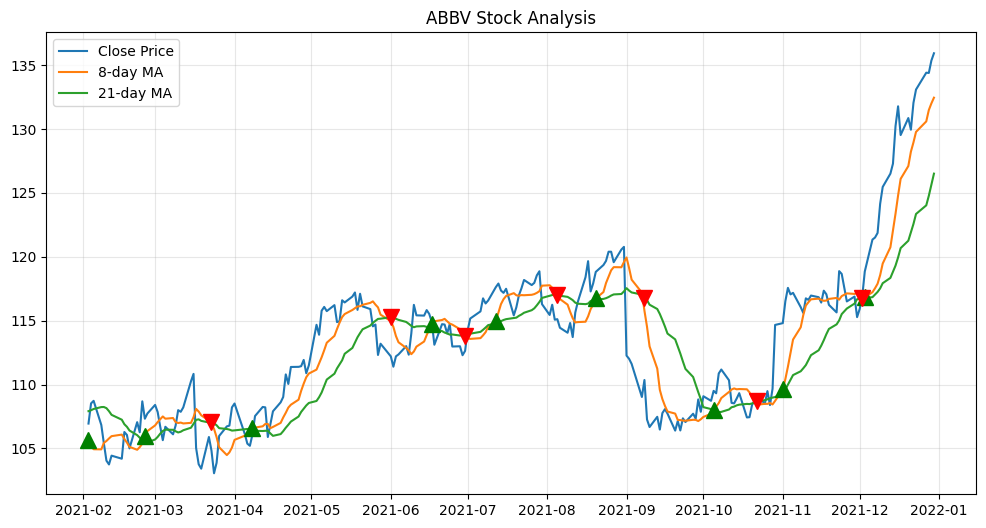

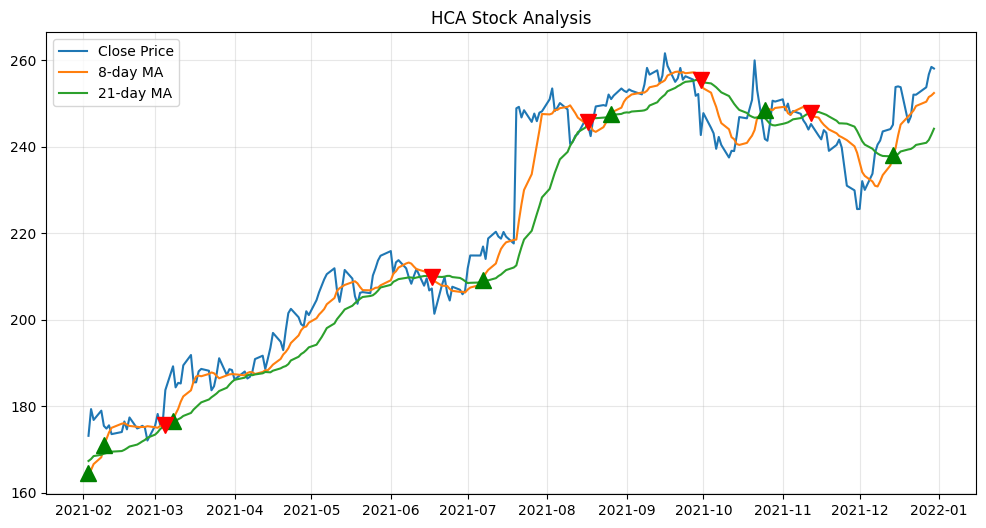

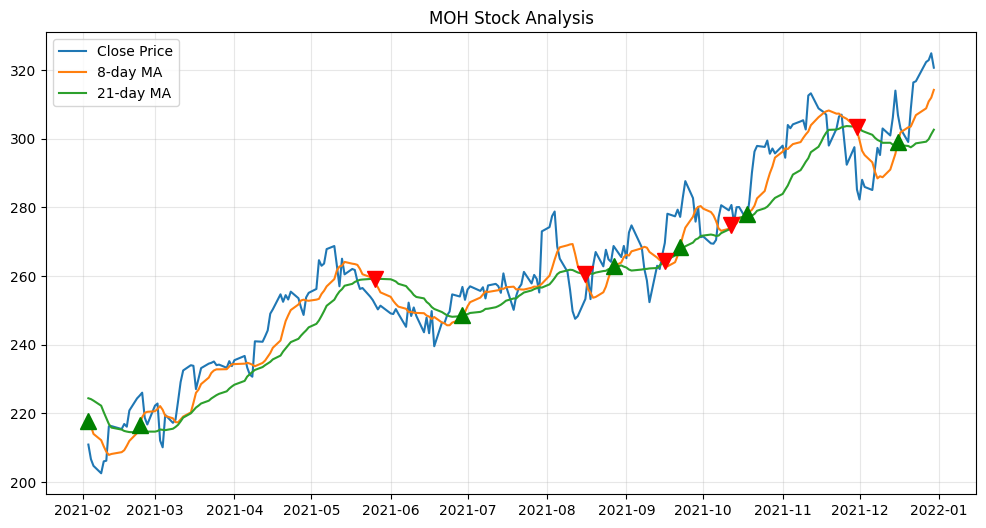

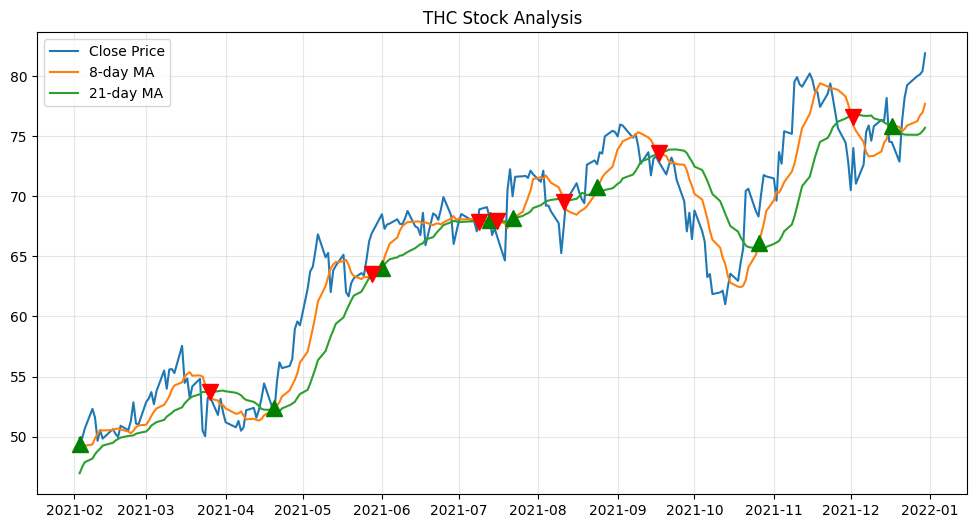

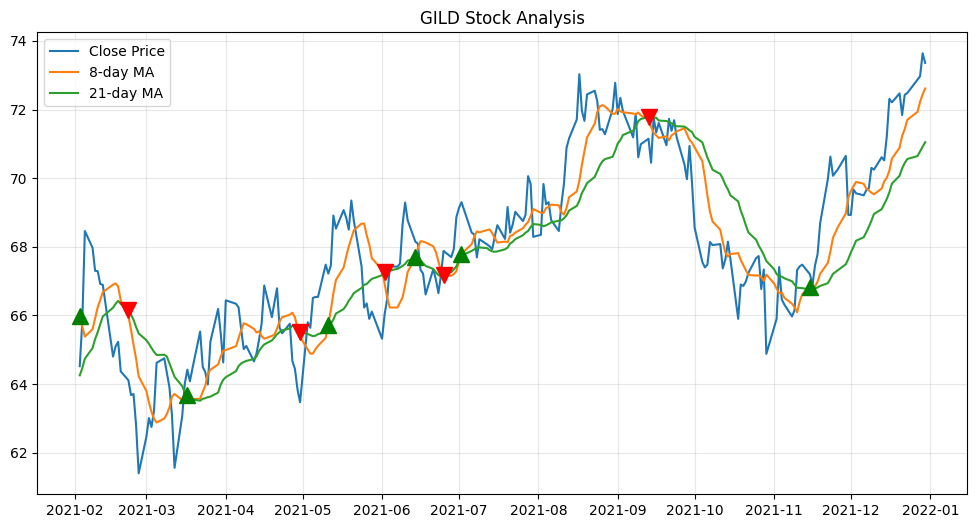

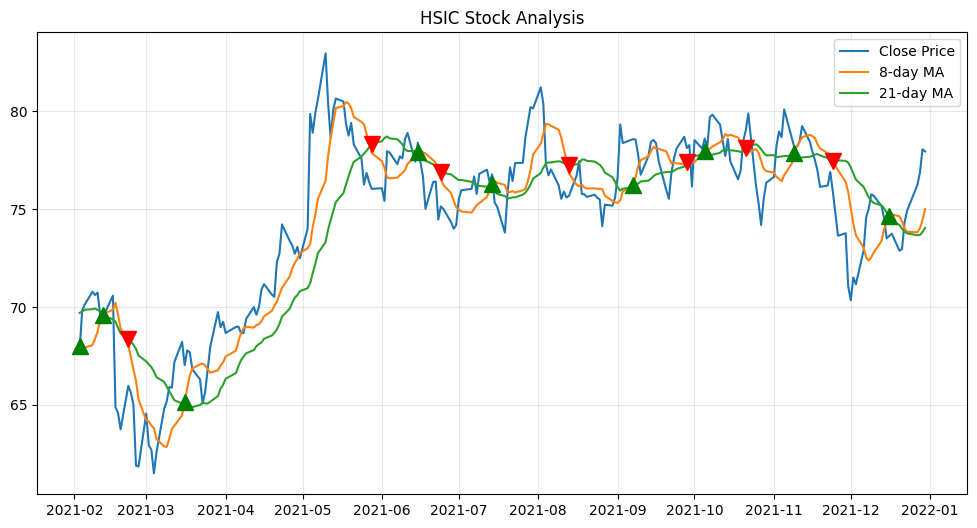

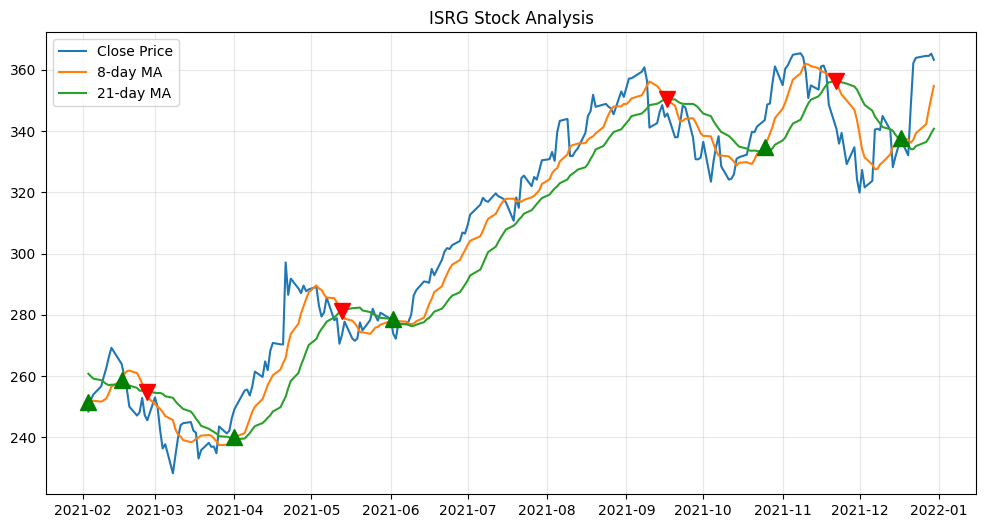

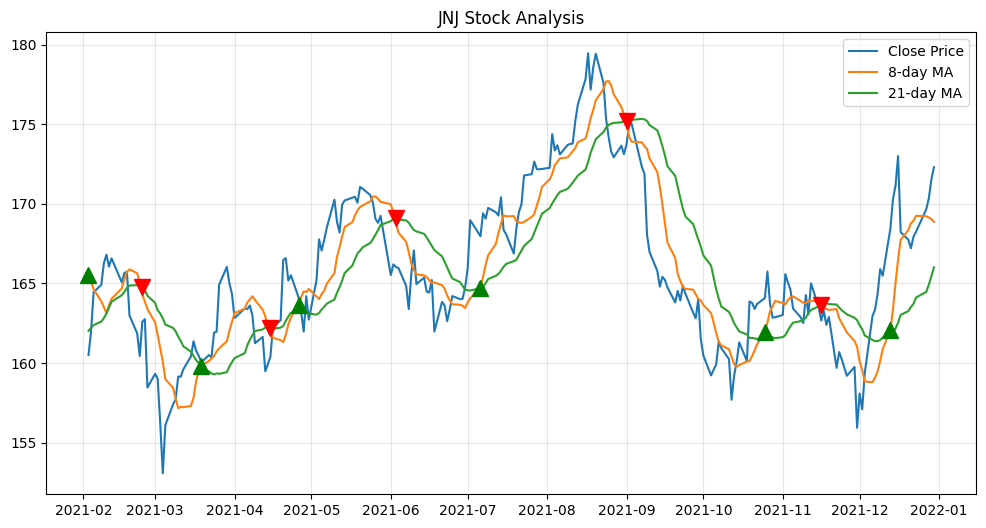

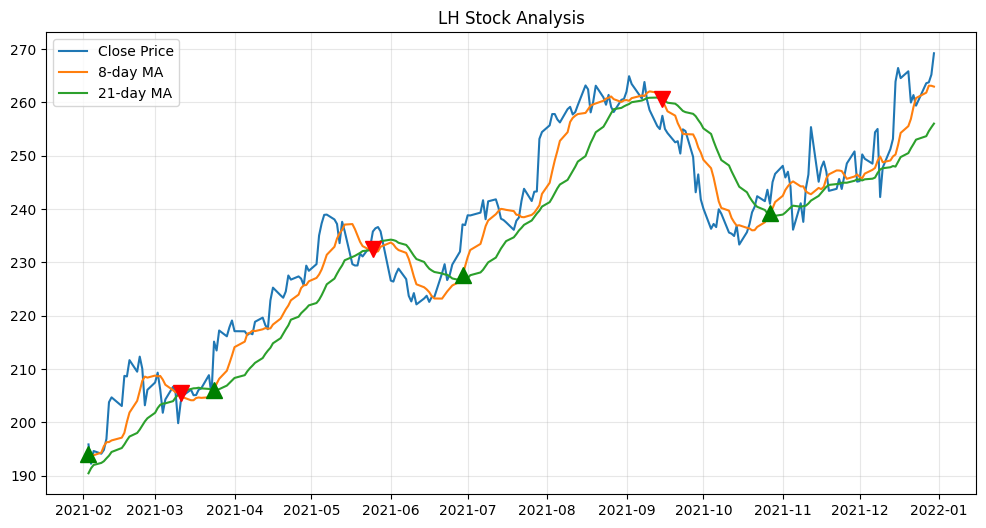

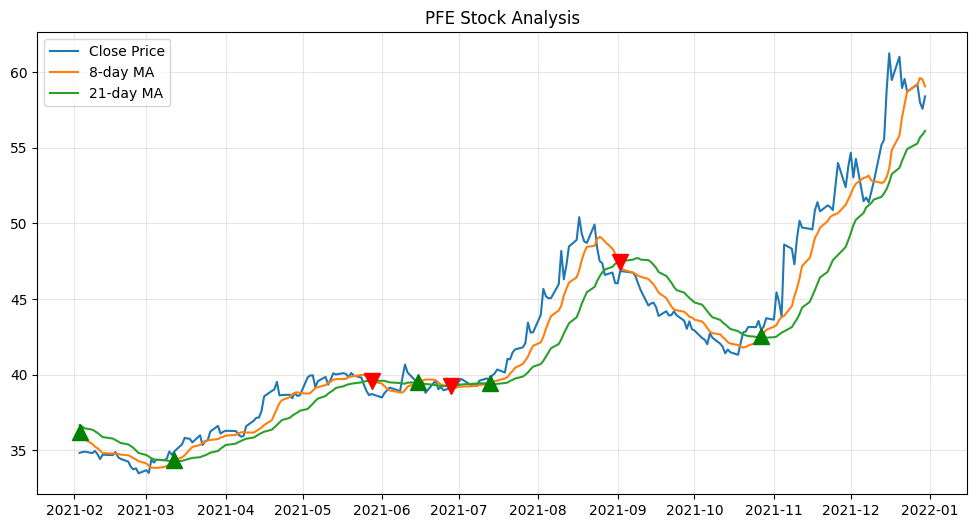


Summary of Cumulative Returns for Healthcare
  Stock  Cumulative_Return
5  HSIC           0.020946
4  GILD           0.050416
7   JNJ           0.065791
0  ABBV           0.093658
2   MOH           0.203813
1   HCA           0.296733
3   THC           0.344389
6  ISRG           0.383273
8    LH           0.407698
9   PFE           0.700304


In [ ]:
# Function for momentum trading strategy
def analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term_ma, long_term_ma):
    # Creating a list for cumulative returns for each stock in the given sector
    for sector, stocks in sector_stocks.items():
        cumulative_returns = {}  # Dictionary to store cumulative returns for each stock in the sector

        print("\n============================")
        print("Sector:", sector)
        print("============================\n")
        # For loop for momentum trading strategy per stock
        for ticker in stocks:
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')
            day = np.arange(1, len(stock_data) + 1)
            stock_data['Day'] = day
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']
            # Short and Long Term Mean Close Prices, ensuring no data leakage
            stock_data['{}-day'.format(short_term_ma)] = stock_data['Close'].rolling(short_term_ma).mean().shift()
            stock_data['{}-day'.format(long_term_ma)] = stock_data['Close'].rolling(long_term_ma).mean().shift()
            stock_data.dropna(inplace=True)

            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term_ma)] > stock_data['{}-day'.format(long_term_ma)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0

            stock_data['system_return'] = stock_data['invested'] * np.log(stock_data['Close']).diff()

            # Plotting
            plt.figure(figsize=(12, 6))
            plt.plot(stock_data['Close'], label='Close Price')
            plt.plot(stock_data['{}-day'.format(short_term_ma)], label='{}-day MA'.format(short_term_ma))
            plt.plot(stock_data['{}-day'.format(long_term_ma)], label='{}-day MA'.format(long_term_ma))
            plt.plot(stock_data.loc[stock_data['signal'] == 1].index, stock_data.loc[stock_data['signal'] == 1]['{}-day'.format(short_term_ma)], '^', color='g', markersize=12)
            plt.plot(stock_data.loc[stock_data['signal'] == -1].index, stock_data.loc[stock_data['signal'] == -1]['{}-day'.format(long_term_ma)], 'v', color='r', markersize=12)
            plt.title('{} Stock Analysis'.format(ticker))
            plt.legend()
            plt.grid(True, alpha=.3)
            plt.show()

            # Displaying Returns Table
            returns_table = pd.DataFrame({'Date': stock_data.index, 'System_Return': stock_data['system_return']})
            returns_table.set_index('Date', inplace=True)

            # Calculating cumulative return and storing in dictionary
            cumulative_return = np.exp(np.sum(stock_data['system_return'])) - 1
            cumulative_returns[ticker] = cumulative_return

        # Creating Summary Table for Cumulative Returns in the sector
        summary_df = pd.DataFrame({'Stock': list(cumulative_returns.keys()), 'Cumulative_Return': list(cumulative_returns.values())})
        summary_df = summary_df.sort_values('Cumulative_Return')
        print("\nSummary of Cumulative Returns for", sector)
        print(summary_df)

# Defining sectors and stocks within each sector
sector_stocks = {
    'Healthcare': ['ABBV','HCA', 'MOH', 'THC', 'GILD', 'HSIC', 'ISRG', 'JNJ', 'LH', 'PFE']
    }

# Momentum Trading Strategy Parameters
start_date = '2021-01-01'
end_date = '2021-12-31'
short_term = 8
long_term = 21

analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term, long_term)

#### Sector Plot: Momentum Trading Performance

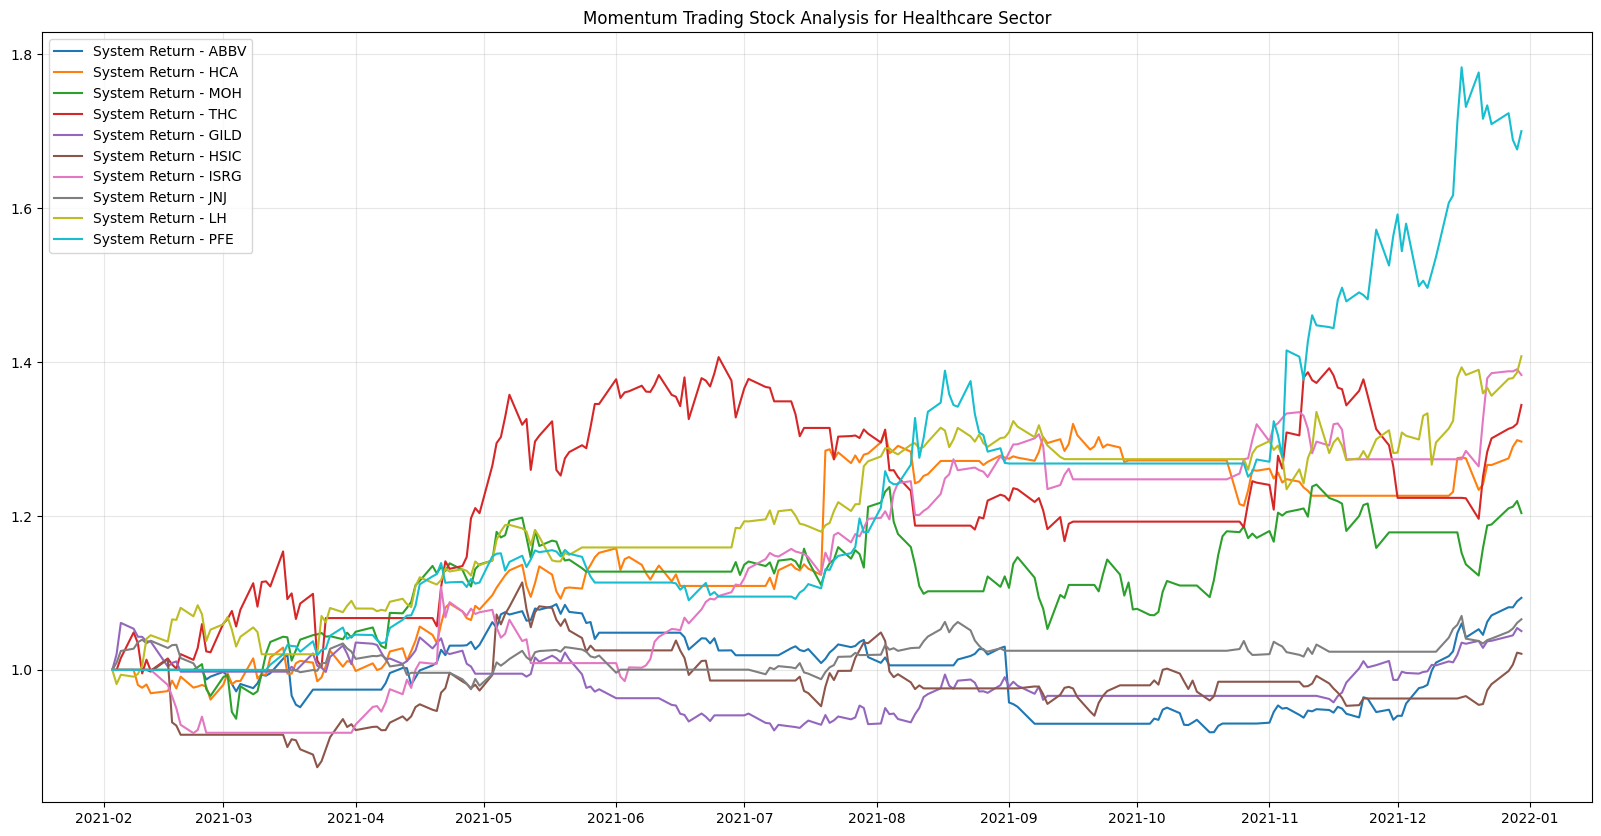

In [ ]:
# Function for plotting Momentum Trading Performance for the Given Sector
def analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term, long_term):
    plt.figure(figsize=(20, 10))
    for ticker in sector_stocks:
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval = stock_interval)
            stock_data['Day'] = np.arange(1, len(stock_data) + 1)
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            # Defining Return
            stock_data['logClose'] = np.log(stock_data['Close'])
            stock_data['return'] = stock_data['logClose'].diff()
            stock_data.loc[stock_data.index[0], 'return'] = 0.0


            # Momentum trading
            stock_data['{}-day'.format(short_term)] = stock_data['Close'].rolling(short_term).mean().shift()
            stock_data['{}-day'.format(long_term)] = stock_data['Close'].rolling(long_term).mean().shift()
            stock_data.dropna(inplace=True)
            stock_data.loc[stock_data.index[0], 'return'] = 0.0
            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term)] > stock_data['{}-day'.format(long_term)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0
            stock_data['system_return'] = (stock_data['invested'] * stock_data['return'])
            stock_data['system_return_plt'] = np.exp(stock_data['system_return']).cumprod()


            # Plotting
            plt.plot(stock_data['system_return_plt'], label='System Return - {}'.format(ticker))


    plt.title('Momentum Trading Stock Analysis for Healthcare Sector')
    plt.legend()
    plt.grid(True, alpha=.3)
    plt.show()


# Defining sectors and stocks within each sector
Healthcare_stocks = ['ABBV', 'HCA', 'MOH', 'THC', 'GILD', 'HSIC', 'ISRG', 'JNJ', 'LH', 'PFE']


# Parameters for Plotting
start_date = '2021-01-01'
end_date = '2021-12-31'
short_term = 8
long_term = 21
stock_interval = '1d'

analyze_stocks_by_sector(Healthcare_stocks, start_date, end_date, short_term, long_term)


### **2.2 Communications Sector**
The following 10 stocks have been selected from the communications sector.

1.   VZ - Verizon
2.   T - AT&T
3.   IPG - Interpublic Group of Companies
4.   PARA - Paramount Global
5.   OMC - Omnicom Group
6.   CMCSA - Comcast
7.   NFLX - Netflix
8.   DIS - Disney
9.   EA - Electronic Arts
10.  NWSA - News Corp


Upon these stocks, the momemntum trading code was run.


Sector: Communications



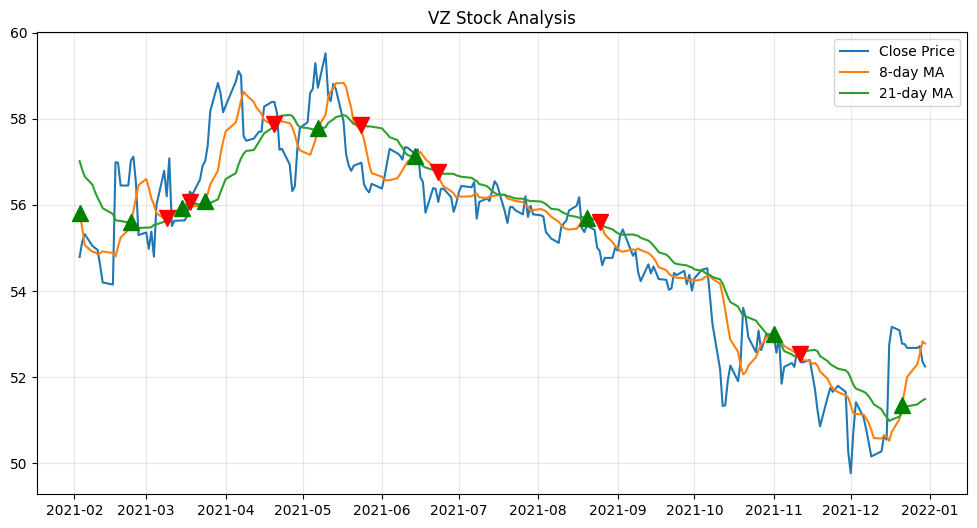

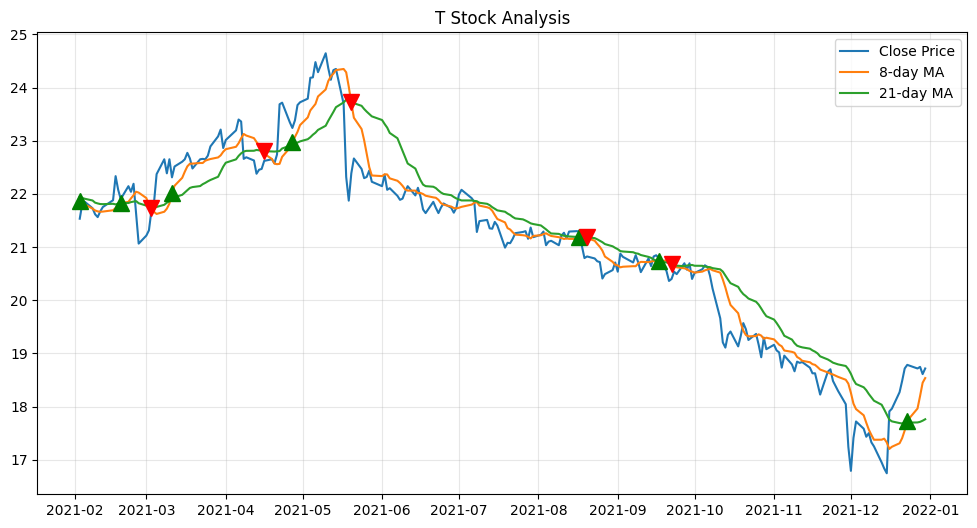

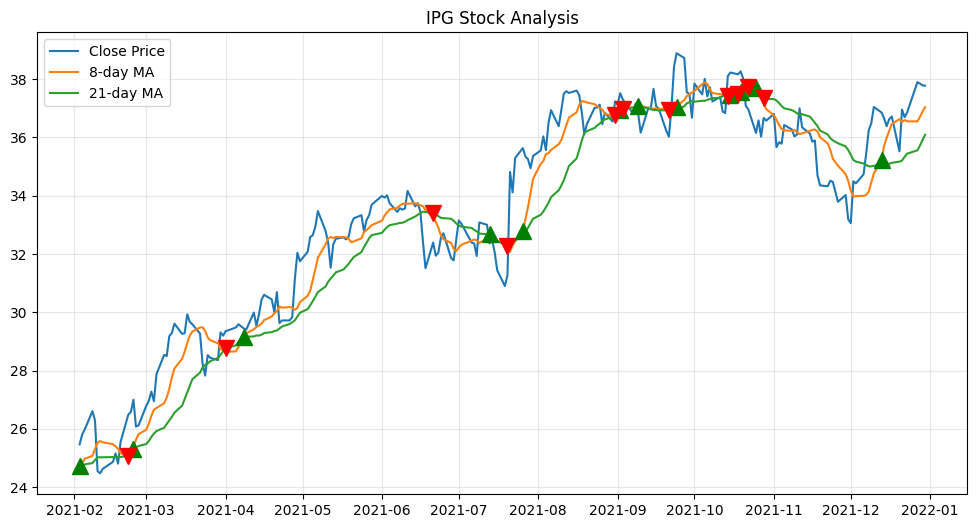

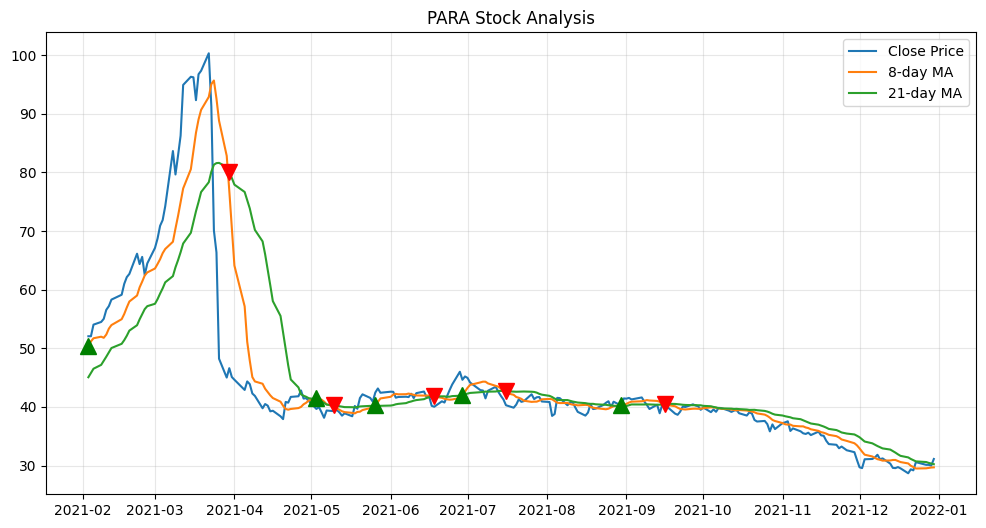

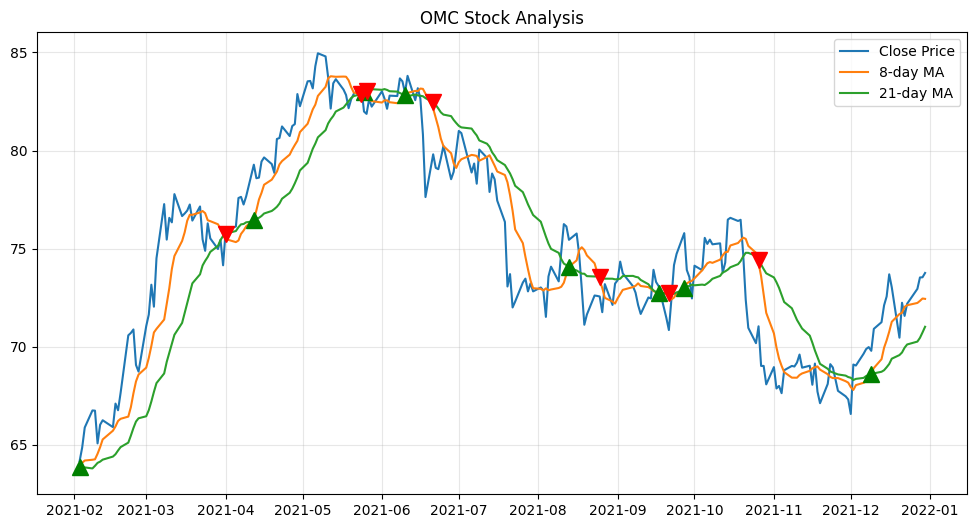

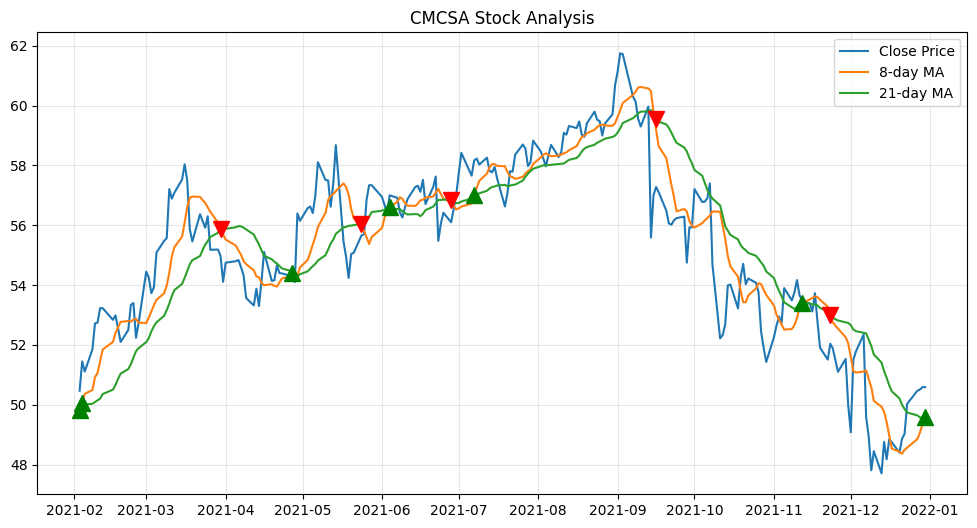

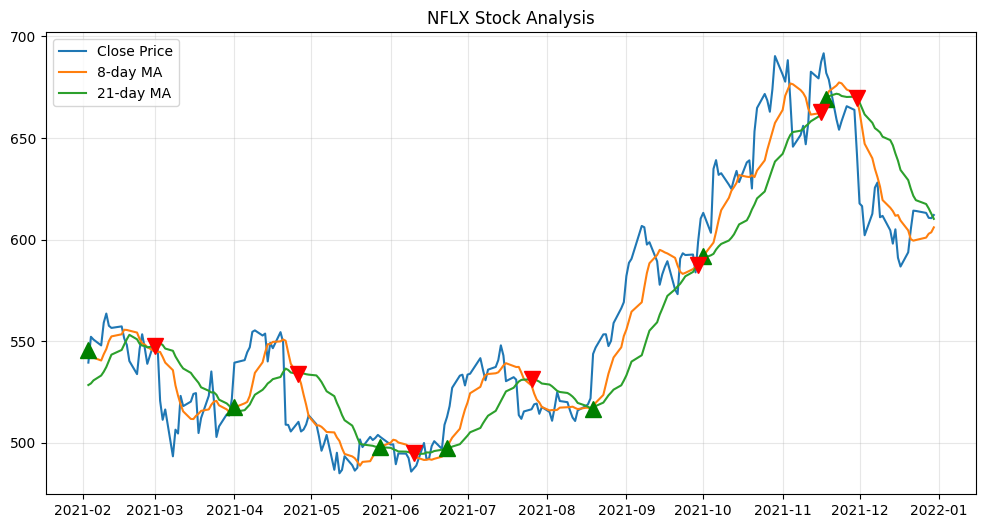

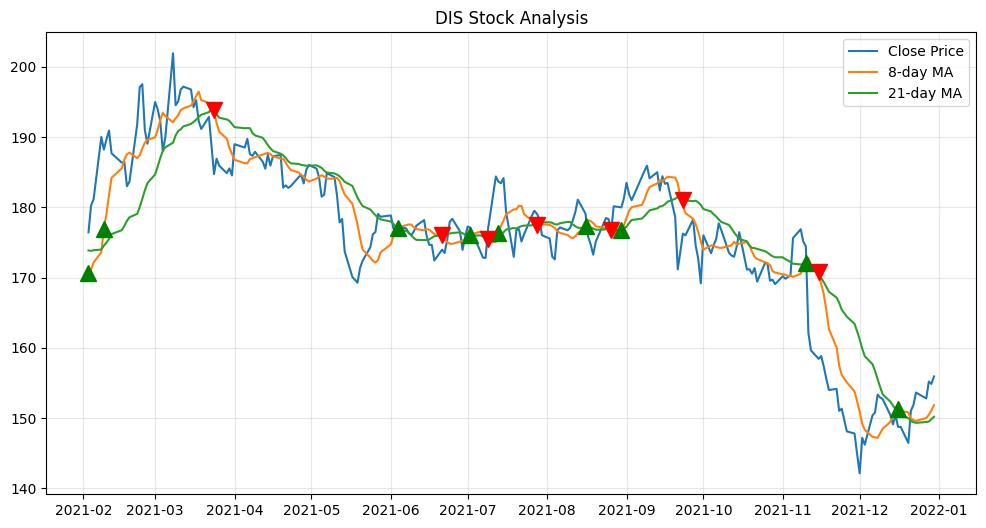

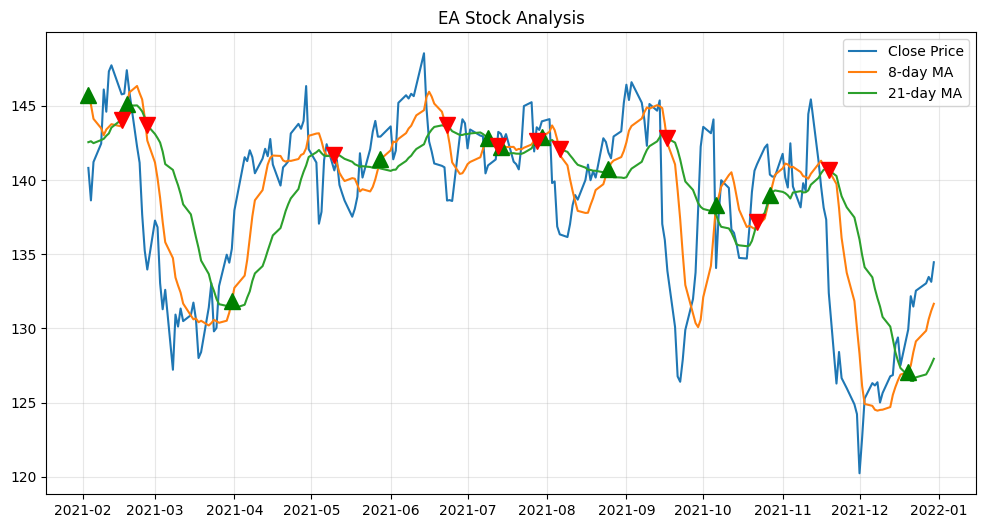

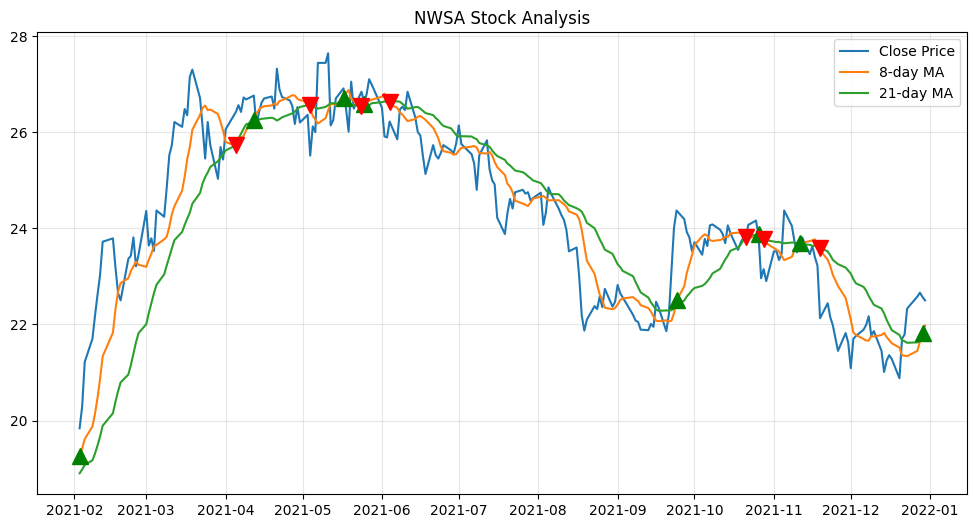


Summary of Cumulative Returns for Communications
   Stock  Cumulative_Return
3   PARA          -0.277033
7    DIS          -0.172612
1      T          -0.144330
8     EA          -0.084571
0     VZ          -0.052456
4    OMC           0.039622
2    IPG           0.043214
5  CMCSA           0.052770
6   NFLX           0.129896
9   NWSA           0.147861


In [ ]:
# Function for momentum trading strategy
def analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term_ma, long_term_ma):
  # Creating a list for cumulative returns for each stock in the given sector
    for sector, stocks in sector_stocks.items():
        cumulative_returns = {}  # Dictionary to store cumulative returns for each stock in the sector

        print("\n============================")
        print("Sector:", sector)
        print("============================\n")
         # For loop for momentum trading strategy per stock
        for ticker in stocks:
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')
            day = np.arange(1, len(stock_data) + 1)
            stock_data['Day'] = day
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']
             # Short and Long Term Mean Close Prices, ensuring no data leakage
            stock_data['{}-day'.format(short_term_ma)] = stock_data['Close'].rolling(short_term_ma).mean().shift()
            stock_data['{}-day'.format(long_term_ma)] = stock_data['Close'].rolling(long_term_ma).mean().shift()
            stock_data.dropna(inplace=True)

            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term_ma)] > stock_data['{}-day'.format(long_term_ma)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0

            stock_data['system_return'] = stock_data['invested'] * np.log(stock_data['Close']).diff()

            # Plotting
            plt.figure(figsize=(12, 6))
            plt.plot(stock_data['Close'], label='Close Price')
            plt.plot(stock_data['{}-day'.format(short_term_ma)], label='{}-day MA'.format(short_term_ma))
            plt.plot(stock_data['{}-day'.format(long_term_ma)], label='{}-day MA'.format(long_term_ma))
            plt.plot(stock_data.loc[stock_data['signal'] == 1].index, stock_data.loc[stock_data['signal'] == 1]['{}-day'.format(short_term_ma)], '^', color='g', markersize=12)
            plt.plot(stock_data.loc[stock_data['signal'] == -1].index, stock_data.loc[stock_data['signal'] == -1]['{}-day'.format(long_term_ma)], 'v', color='r', markersize=12)
            plt.title('{} Stock Analysis'.format(ticker))
            plt.legend()
            plt.grid(True, alpha=.3)
            plt.show()

            # Displaying Returns Table
            returns_table = pd.DataFrame({'Date': stock_data.index, 'System_Return': stock_data['system_return']})
            returns_table.set_index('Date', inplace=True)

            # Calculating cumulative return and storing in dictionary
            cumulative_return = np.exp(np.sum(stock_data['system_return'])) - 1
            cumulative_returns[ticker] = cumulative_return

        # Creating Summary Table for Cumulative Returns in the sector
        summary_df = pd.DataFrame({'Stock': list(cumulative_returns.keys()), 'Cumulative_Return': list(cumulative_returns.values())})
        summary_df = summary_df.sort_values('Cumulative_Return')
        print("\nSummary of Cumulative Returns for", sector)
        print(summary_df)

# Defining sectors and stocks within each sector
sector_stocks = {
        'Communications': ['VZ', 'T', 'IPG', 'PARA', 'OMC', 'CMCSA', 'NFLX', 'DIS', 'EA', 'NWSA']
}

# Momentum Trading Strategy Parameters
start_date = '2021-01-01'
end_date = '2021-12-31'
short_term = 8
long_term = 21

analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term, long_term)

#### Sector Plot: Momentum Trading Performance

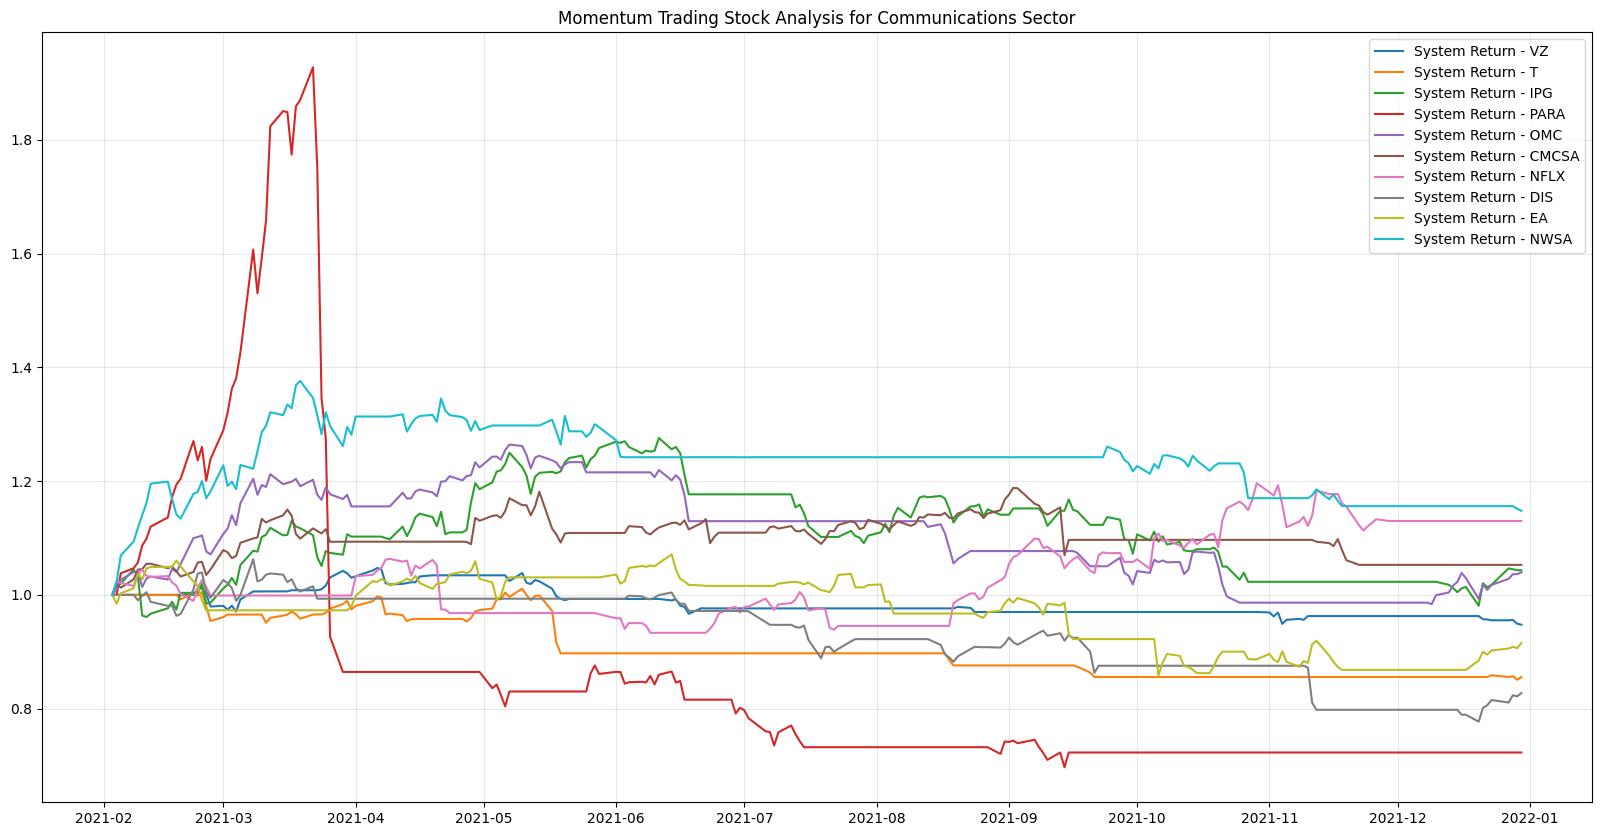

In [ ]:
# Function for plotting Momentum Trading Performance for the Given Sector
def analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term, long_term):
    plt.figure(figsize=(20, 10))
    for ticker in sector_stocks:
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval = stock_interval)
            stock_data['Day'] = np.arange(1, len(stock_data) + 1)
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            # Defining Return
            stock_data['logClose'] = np.log(stock_data['Close'])
            stock_data['return'] = stock_data['logClose'].diff()
            stock_data.loc[stock_data.index[0], 'return'] = 0.0


            # Momentum trading
            stock_data['{}-day'.format(short_term)] = stock_data['Close'].rolling(short_term).mean().shift()
            stock_data['{}-day'.format(long_term)] = stock_data['Close'].rolling(long_term).mean().shift()
            stock_data.dropna(inplace=True)
            stock_data.loc[stock_data.index[0], 'return'] = 0.0
            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term)] > stock_data['{}-day'.format(long_term)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0
            stock_data['system_return'] = (stock_data['invested'] * stock_data['return'])
            stock_data['system_return_plt'] = np.exp(stock_data['system_return']).cumprod()

            # Plotting
            plt.plot(stock_data['system_return_plt'], label='System Return - {}'.format(ticker))


    plt.title('Momentum Trading Stock Analysis for Communications Sector')
    plt.legend()
    plt.grid(True, alpha=.3)
    plt.show()


# Define sectors and stocks within each sector
Communications_stocks = ['VZ', 'T', 'IPG', 'PARA', 'OMC', 'CMCSA', 'NFLX', 'DIS', 'EA', 'NWSA']


# Plotting Parameters
start_date = '2021-01-01'
end_date = '2021-12-31'
short_term = 8
long_term = 21
stock_interval = '1d'

analyze_stocks_by_sector(Communications_stocks, start_date, end_date, short_term, long_term)


### **2.3 Utilities Sector**
The following 10 stocks have been selected from the utilities sector.

1.   AES - AES Corporation
2.   LNT - Alliant Energy
3.   AEP - American Electric Power
4.   AWK - American Water Works
5.   EXC - Exelon
6.   EIX - Edison International
7.   DTE - DTE Energy
8.   CMS - CMS Energy
9.   NEE - NextEra Energy
10.  DUK - Duke Energy


Upon these stocks, the momemntum trading code was run.


Sector: Utilities



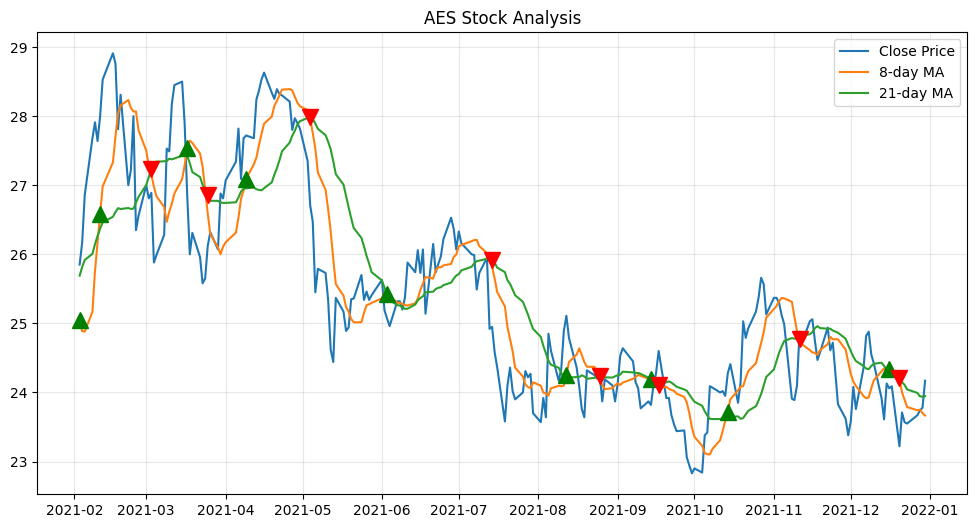

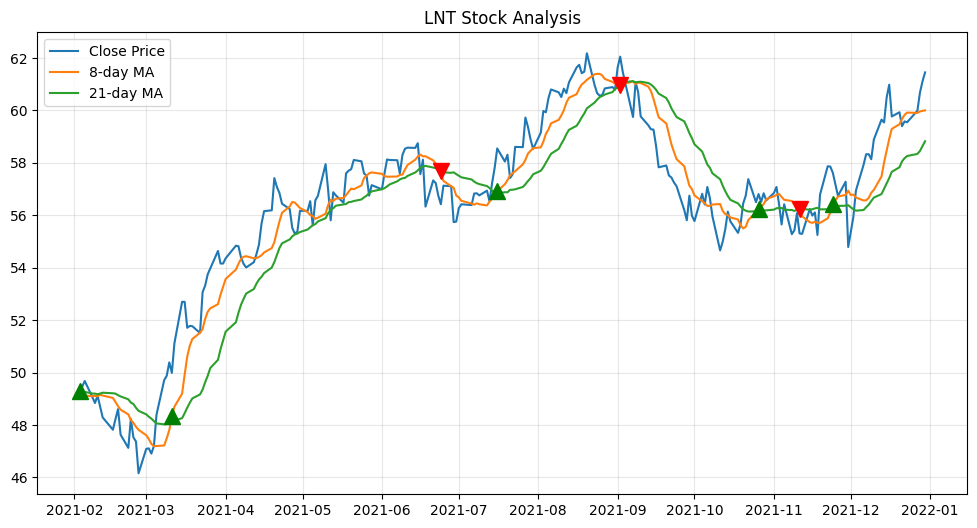

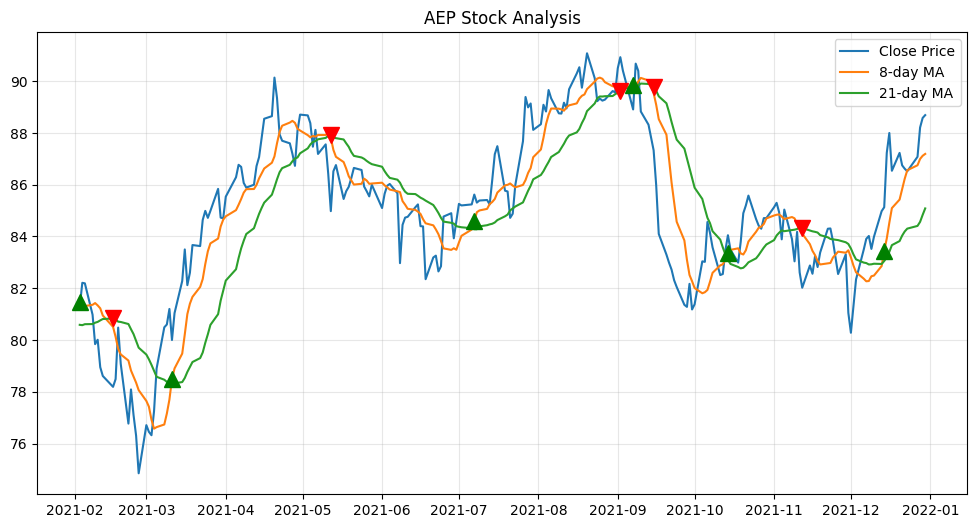

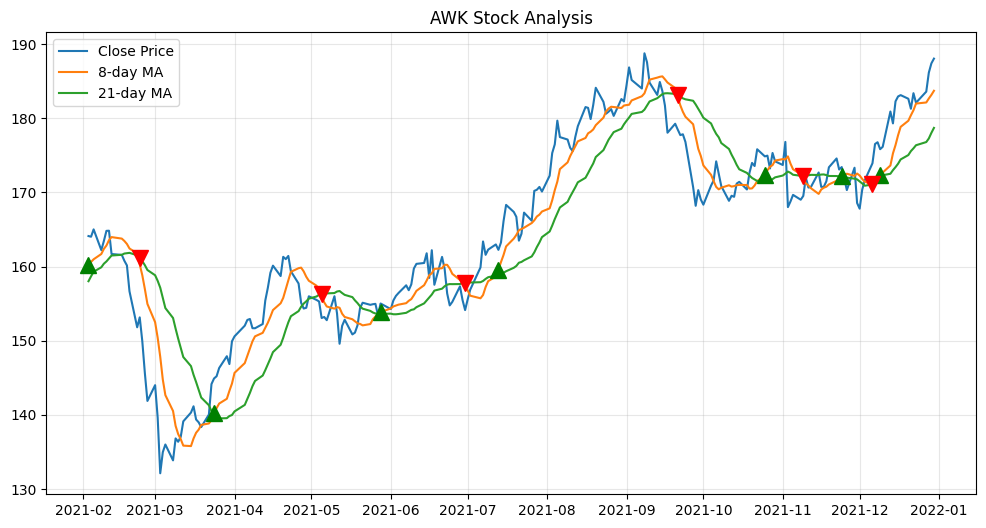

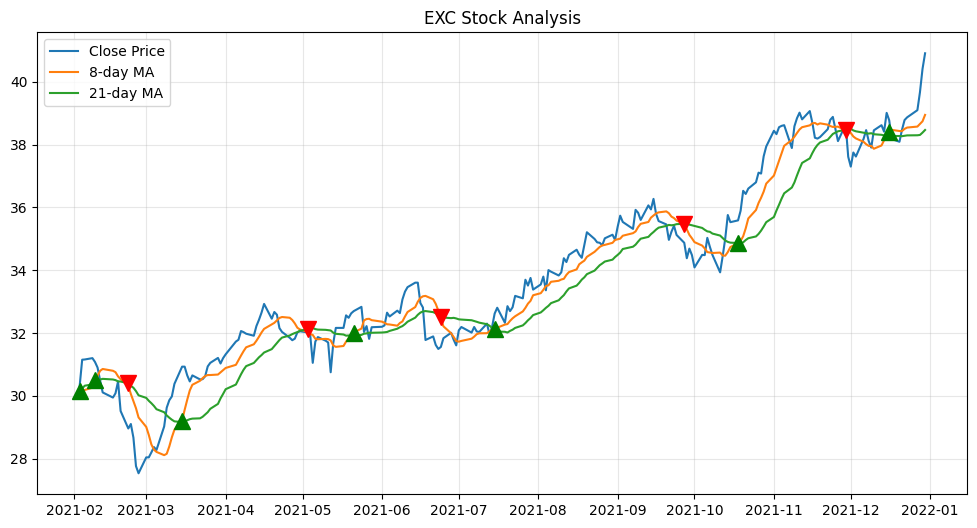

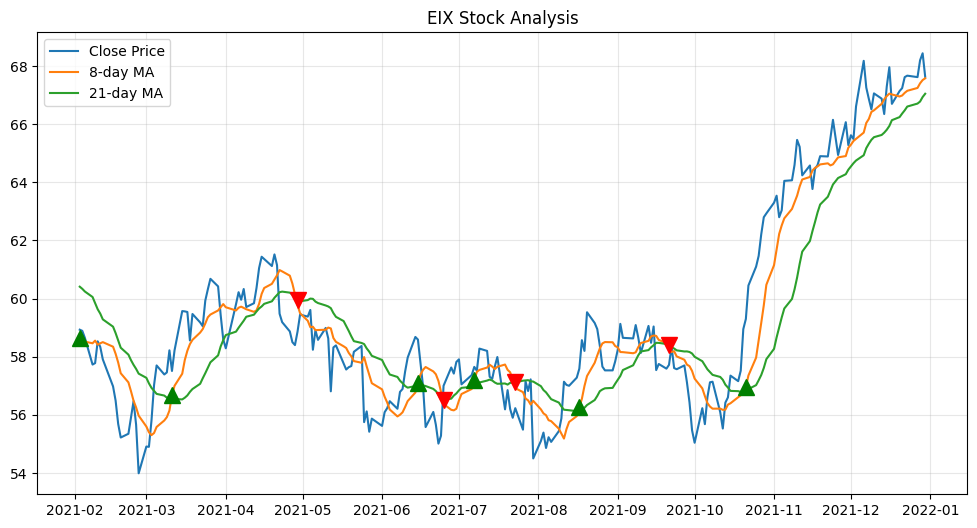

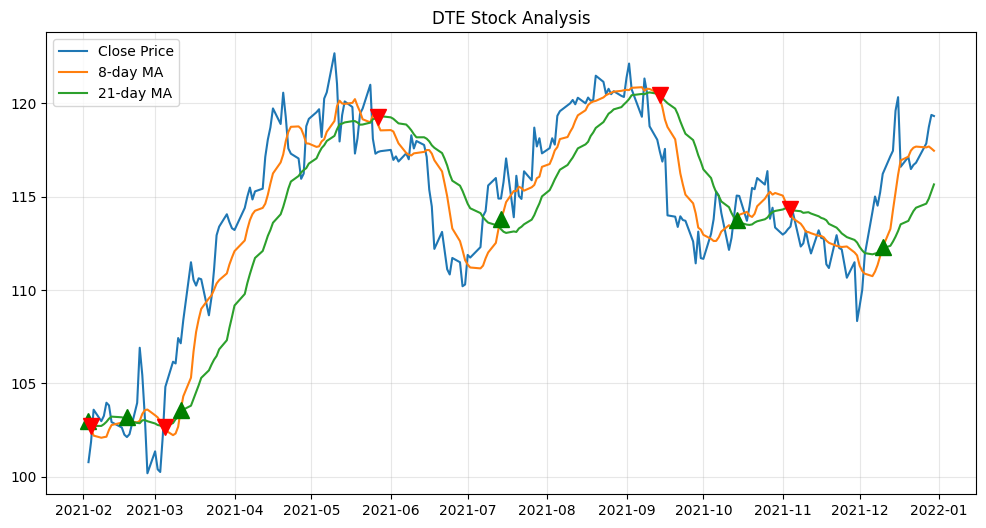

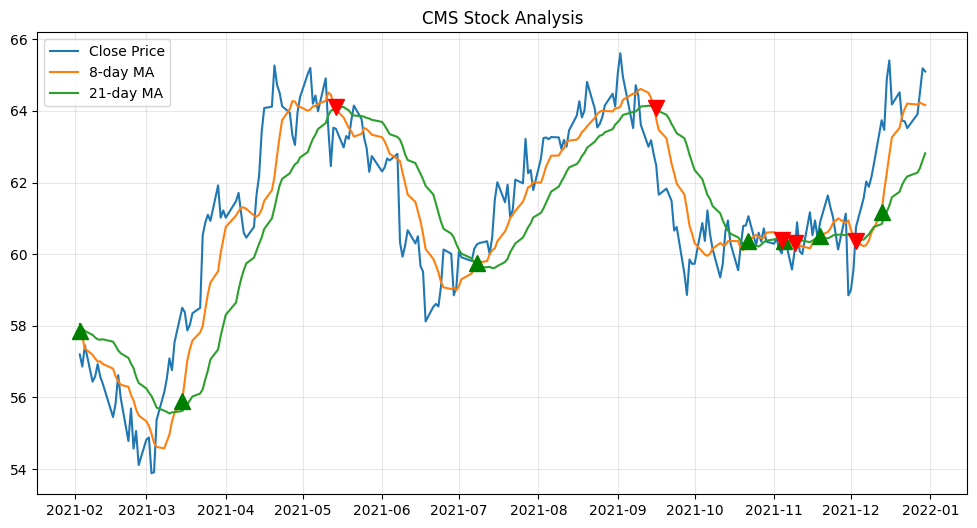

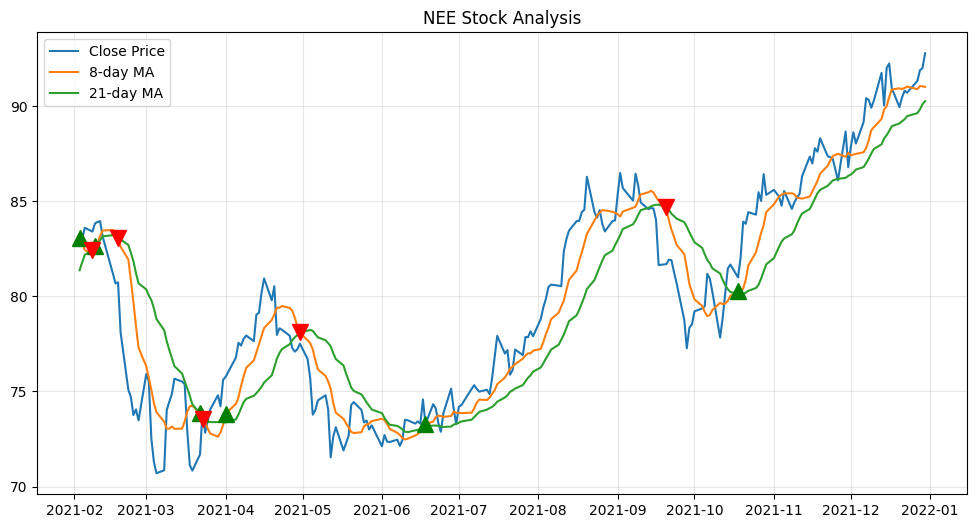

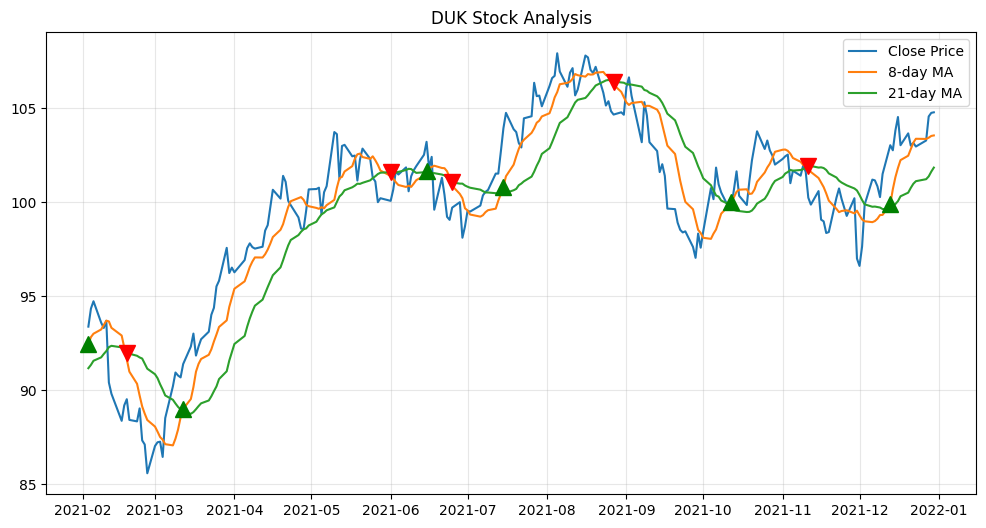


Summary of Cumulative Returns for Utilities
  Stock  Cumulative_Return
0   AES          -0.133664
5   EIX           0.062051
9   DUK           0.095469
2   AEP           0.096594
3   AWK           0.126341
6   DTE           0.153643
7   CMS           0.161041
4   EXC           0.182285
8   NEE           0.251476
1   LNT           0.265856


In [ ]:
# Function for momentum trading strategy
def analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term_ma, long_term_ma):
  # Creating a list for cumulative returns for each stock in the given sector
    for sector, stocks in sector_stocks.items():
        cumulative_returns = {}  # Dictionary to store cumulative returns for each stock in the sector

        print("\n============================")
        print("Sector:", sector)
        print("============================\n")
        # For loop for momentum trading strategy per stock
        for ticker in stocks:
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')
            day = np.arange(1, len(stock_data) + 1)
            stock_data['Day'] = day
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']
            # Short and Long Term Mean Close Prices, ensuring no data leakage
            stock_data['{}-day'.format(short_term_ma)] = stock_data['Close'].rolling(short_term_ma).mean().shift()
            stock_data['{}-day'.format(long_term_ma)] = stock_data['Close'].rolling(long_term_ma).mean().shift()
            stock_data.dropna(inplace=True)

            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term_ma)] > stock_data['{}-day'.format(long_term_ma)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0

            stock_data['system_return'] = stock_data['invested'] * np.log(stock_data['Close']).diff()

            # Plotting
            plt.figure(figsize=(12, 6))
            plt.plot(stock_data['Close'], label='Close Price')
            plt.plot(stock_data['{}-day'.format(short_term_ma)], label='{}-day MA'.format(short_term_ma))
            plt.plot(stock_data['{}-day'.format(long_term_ma)], label='{}-day MA'.format(long_term_ma))
            plt.plot(stock_data.loc[stock_data['signal'] == 1].index, stock_data.loc[stock_data['signal'] == 1]['{}-day'.format(short_term_ma)], '^', color='g', markersize=12)
            plt.plot(stock_data.loc[stock_data['signal'] == -1].index, stock_data.loc[stock_data['signal'] == -1]['{}-day'.format(long_term_ma)], 'v', color='r', markersize=12)
            plt.title('{} Stock Analysis'.format(ticker))
            plt.legend()
            plt.grid(True, alpha=.3)
            plt.show()

            # Displaying Returns Table
            returns_table = pd.DataFrame({'Date': stock_data.index, 'System_Return': stock_data['system_return']})
            returns_table.set_index('Date', inplace=True)

            # Calculating cumulative return and storing in dictionary
            cumulative_return = np.exp(np.sum(stock_data['system_return'])) - 1
            cumulative_returns[ticker] = cumulative_return

        # Creating Summary Table for Cumulative Returns in the sector
        summary_df = pd.DataFrame({'Stock': list(cumulative_returns.keys()), 'Cumulative_Return': list(cumulative_returns.values())})
        summary_df = summary_df.sort_values('Cumulative_Return')
        print("\nSummary of Cumulative Returns for", sector)
        print(summary_df)

# Defining sectors and stocks within each sector
sector_stocks = {
       'Utilities': ['AES', 'LNT', 'AEP', 'AWK', 'EXC', 'EIX', 'DTE', 'CMS', 'NEE', 'DUK']
    }

# Momentum Trading Strategy Parameters
start_date = '2021-01-01'
end_date = '2021-12-31'
short_term = 8
long_term = 21

analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term, long_term)

#### Sector Plot: Momentum Trading Performance

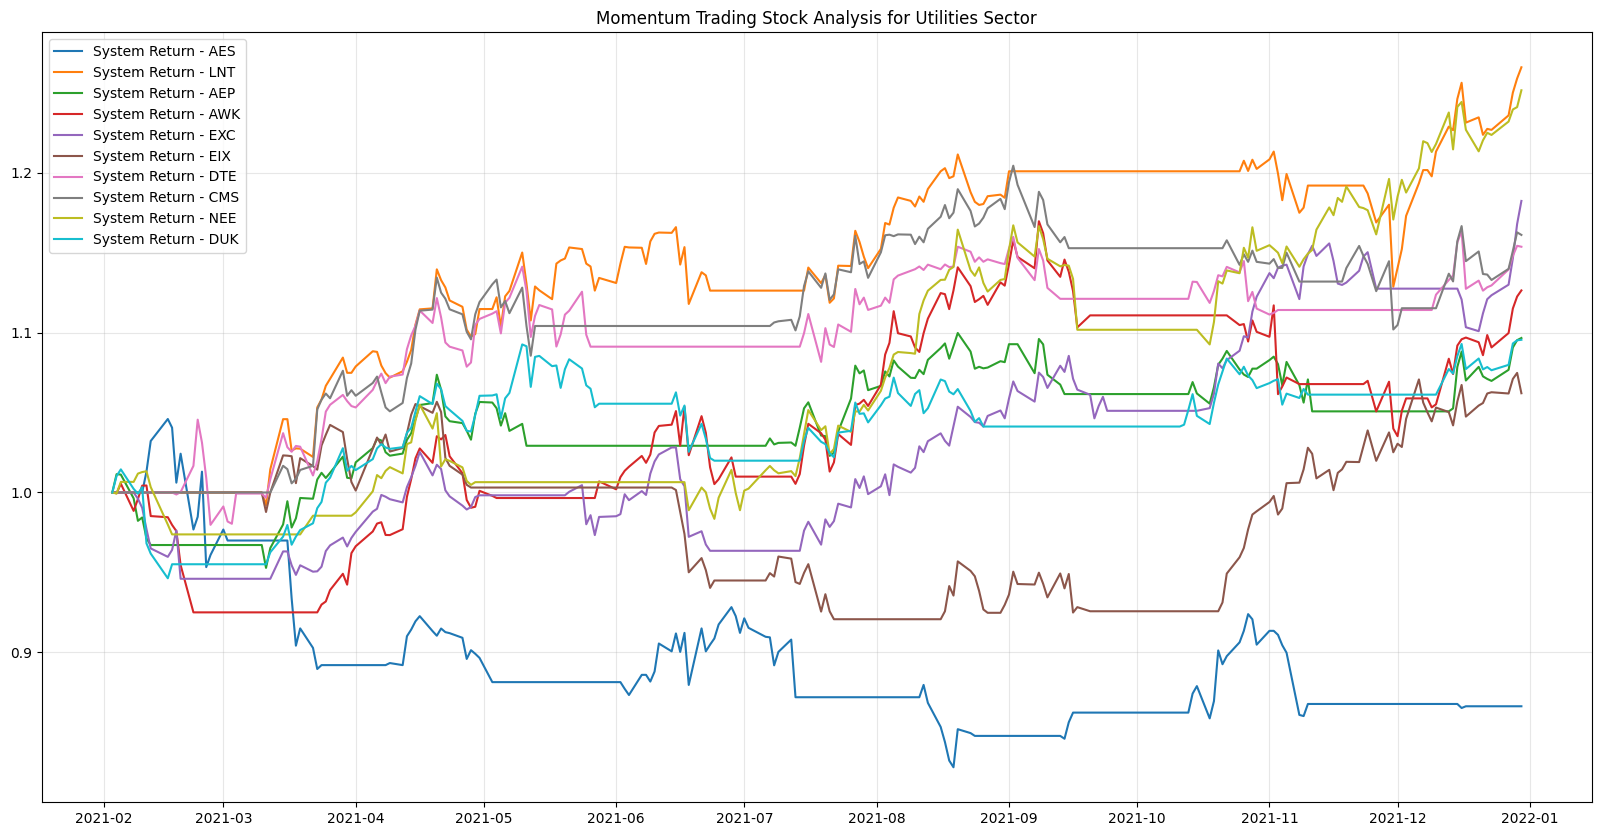

In [ ]:
# Function for plotting Momentum Trading Performance for the Given Sector
def analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term, long_term):
    plt.figure(figsize=(20, 10))
    for ticker in sector_stocks:
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval = stock_interval)
            stock_data['Day'] = np.arange(1, len(stock_data) + 1)
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            # Defining Return
            stock_data['logClose'] = np.log(stock_data['Close'])
            stock_data['return'] = stock_data['logClose'].diff()
            stock_data.loc[stock_data.index[0], 'return'] = 0.0


            # Momentum trading
            stock_data['{}-day'.format(short_term)] = stock_data['Close'].rolling(short_term).mean().shift()
            stock_data['{}-day'.format(long_term)] = stock_data['Close'].rolling(long_term).mean().shift()
            stock_data.dropna(inplace=True)
            stock_data.loc[stock_data.index[0], 'return'] = 0.0
            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term)] > stock_data['{}-day'.format(long_term)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0
            stock_data['system_return'] = (stock_data['invested'] * stock_data['return'])
            stock_data['system_return_plt'] = np.exp(stock_data['system_return']).cumprod()

            # Plotting
            plt.plot(stock_data['system_return_plt'], label='System Return - {}'.format(ticker))


    plt.title('Momentum Trading Stock Analysis for Utilities Sector')
    plt.legend()
    plt.grid(True, alpha=.3)
    plt.show()


# Defining sectors and stocks within each sector
Utilities_stocks = ['AES', 'LNT', 'AEP', 'AWK', 'EXC', 'EIX', 'DTE', 'CMS', 'NEE', 'DUK']


# Plotting Parameters
start_date = '2021-01-01'
end_date = '2021-12-31'
short_term = 8
long_term = 21
stock_interval = '1d'

analyze_stocks_by_sector(Utilities_stocks, start_date, end_date, short_term, long_term)


### 2.4 Summary Table

In [ ]:
# List to store system return and buy and hold return per sector for each stock
results = []
def analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term, long_term):
    for sector, stocks in sector_stocks.items():
        cumulative_returns = {}  # Dictionary to store cumulative returns for each stock in the sector
        # Split Table by sector
        print("\n============================")
        print("Sector:", sector)
        print("============================\n")
        # For loop per stock
        for ticker in stocks:
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval = stock_interval)
            stock_data['Day'] = np.arange(1, len(stock_data) + 1)
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            # Defining Return
            stock_data['logClose'] = np.log(stock_data['Close'])
            stock_data['return'] = stock_data['logClose'].diff()
            stock_data.loc[stock_data.index[0], 'return'] = 0.0

            # Momentum trading
            stock_data['{}-day'.format(short_term)] = stock_data['Close'].rolling(short_term).mean().shift()
            stock_data['{}-day'.format(long_term)] = stock_data['Close'].rolling(long_term).mean().shift()
            stock_data.dropna(inplace=True)
            stock_data.loc[stock_data.index[0], 'return'] = 0.0
            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term)] > stock_data['{}-day'.format(long_term)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0
            stock_data['system_return'] = (stock_data['invested'] * stock_data['return'])
            stock_data['system_return_plt'] = np.exp(stock_data['system_return']).cumprod()


            # Buy and Hold Strategy
            buy_hold_return = np.exp(np.sum(stock_data['return'])) - 1
            stock_data['buy_hold'] = np.exp(stock_data['return']).cumprod()

            # Displaying Returns Table
            returns_table = pd.DataFrame({'Date': stock_data.index, 'System_Return': stock_data['system_return']})
            returns_table.set_index('Date', inplace=True)

            # Calculate cumulative return for system strategy and store in dictionary
            cumulative_return = np.exp(np.sum(stock_data['system_return'])) - 1
            cumulative_returns[ticker] = {'System_Return': cumulative_return, 'Buy_Hold_Return': buy_hold_return}
            results.append((sector,ticker, cumulative_return,buy_hold_return))

        # Creating Summary Table for Cumulative Returns in the sector
        summary_df = pd.DataFrame.from_dict(cumulative_returns, orient='index')
        summary_df.index.name = 'Stock'
        summary_df = summary_df.reset_index().rename(columns={'index': 'Stock'}).sort_values('System_Return', ascending = False)
        print("\nSummary of Cumulative Returns for", sector)
        print(summary_df)

# Print the combined results_df
print(results)


# Defining sectors and stocks within each sector
sector_stocks = {
      'Healthcare': ['ABBV', 'HCA', 'MOH', 'THC', 'GILD', 'HSIC', 'ISRG', 'JNJ', 'LH', 'PFE'],
      'Utilities': ['AES', 'LNT', 'AEP', 'AWK', 'EXC', 'EIX', 'DTE', 'CMS', 'NEE', 'DUK'],
      'Communications': ['VZ', 'T', 'IPG', 'PARA', 'OMC', 'CMCSA', 'NFLX', 'DIS', 'EA', 'NWSA']
}


# Function Parameters for Table below
start_date = '2021-01-01'
end_date = '2021-12-31'
short_term = 8
long_term = 21
stock_interval = '1d'

analyze_stocks_by_sector(sector_stocks, start_date, end_date, short_term, long_term)


[]

Sector: Healthcare


Summary of Cumulative Returns for Healthcare
  Stock  System_Return  Buy_Hold_Return
9   PFE       0.700304         0.676234
8    LH       0.407698         0.374359
6  ISRG       0.383273         0.462168
3   THC       0.344389         0.642141
1   HCA       0.296733         0.490931
2   MOH       0.203813         0.520531
0  ABBV       0.093658         0.270968
7   JNJ       0.065791         0.073583
4  GILD       0.050416         0.137012
5  HSIC       0.020946         0.149875

Sector: Utilities


Summary of Cumulative Returns for Utilities
  Stock  System_Return  Buy_Hold_Return
1   LNT       0.265856         0.251273
8   NEE       0.251476         0.117038
4   EXC       0.182285         0.350047
7   CMS       0.161041         0.138112
6   DTE       0.153643         0.183930
3   AWK       0.126341         0.145756
2   AEP       0.096594         0.091166
9   DUK       0.095469         0.122069
5   EIX       0.062051         0.147633
0   AES      -0.133664   

#### Loading results into dataframe

In [ ]:
results_df = pd.DataFrame(results) # created a dataframe from results list
results_df.rename({0:'Sector',1:'Ticker',2:'Momentum_trading_return',3:'Buy_hold_return'}, axis = 1, inplace = True) # rename column
results_df.sort_values(['Sector','Momentum_trading_return'], ascending = False, inplace = True) # sorting columns by sector and then descending momentum trading returns

In [ ]:
results_df

Sector Ticker  Momentum_trading_return  Buy_hold_return
11       Utilities    LNT                 0.265856         0.251273
18       Utilities    NEE                 0.251476         0.117038
14       Utilities    EXC                 0.182285         0.350047
17       Utilities    CMS                 0.161041         0.138112
16       Utilities    DTE                 0.153643         0.183930
13       Utilities    AWK                 0.126341         0.145756
12       Utilities    AEP                 0.096594         0.091166
19       Utilities    DUK                 0.095469         0.122069
15       Utilities    EIX                 0.062051         0.147633
10       Utilities    AES                -0.133664        -0.064990
9       Healthcare    PFE                 0.700304         0.676234
8       Healthcare     LH                 0.407698         0.374359
6       Healthcare   ISRG                 0.383273         0.462168
3       Healthcare    THC                 0.344389         0.642141
1       Healthcare    HCA                 0.296733         0.490931
2       Healthcare    MOH                 0.203813         0.520531
0       Healthcare   ABBV                 0.093658         0.270968
7       Healthcare    JNJ                 0.065791         0.073583
4       Healthcare   GILD                 0.050416         0.137012
5       Healthcare   HSIC                 0.020946         0.149875
29  Communications   NWSA                 0.147861         0.134073
26  Communications   NFLX                 0.129896         0.134656
25  Communications  CMCSA                 0.052770         0.002378
22  Communications    IPG                 0.043214         0.482921
24  Communications    OMC                 0.039622         0.149447
20  Communications     VZ                -0.052456        -0.046359
28  Communications     EA                -0.084571        -0.045164
21  Communications      T                -0.144330        -0.130831
27  Communications    DIS                -0.172612        -0.116193
23  Communications   PARA                -0.277033        -0.402228

#### Discuss Observations

**Healthcare Sector**

Based on our comprehensive analysis of momentum trading stock data, the top performers within the observed period of January 2021 to December 2021 were identified as:

        1.  PFE - Pfizer
        2.  LH - LabCorp
        3.  ISRG - Intuitive Surgical

* PFE emerged as the best performer,with a system return value of 0.700, indicative of its exceptional performance. This remarkable surge in PFE's investor interest can be attributed to its pivotal role in vaccine development and distribution during the COVID-19 pandemic, significantly boosting its stock price and growth prospects, distinctly setting it apart from both LH and ISRG.

* LH showcased commendable performance as the second-best performer, maintaining consistent daily returns surpassing the value of 1, culminating in a gradual upward trajectory. With a system return value of 0.408, LH displayed notable performance during the assessed timeframe.

* ISRG secured its position as the third top performer, exhibiting relatively strong performance with a system return value of 0.3834, albeit trailing behind PFE and LH. The discernible discrepancy between PFE and the other two stocks, LH and ISRG, can be largely attributed to PFE's unprecedented surge in investor interest due to its instrumental role amidst the pandemic, fostering heightened growth potential and distinguishing it from its counterparts in the healthcare sector.

**Communications Sector**

Based on our comprehensive analysis of momentum trading stock data, the top performers within the observed period of January 2021 to December 2021 were identified as:

      1.  NWSA - News Corp
      2.  NFLX - Netflix
      3.  CMCSA - Comcast

* The stock that notably outperformed its counterparts was NWSA, showcasing a commendable stability and a consistently ascending trend in its returns. With a system return yielding 0.148, NWSA emerged as the prime performer within this analysis.

*  Following closely behind, NTFX initially presented a surprising revelation. However, upon meticulous scrutiny of the momentum trading analysis graph, it became evident that NWSA marginally outperformed NTFX, with a system yield of 0.140, triumphing by a narrow margin of 0.007. Notably, in employing the buy-and-hold strategy, a return of 0.41 was observed for NTFX, substantially surpassing NWSA's value of 0.134. This discrepancy indicates that opting for the buy-and-hold approach with Google delivers a markedly higher return compared to NWSA.

* CMCSA yielded a system return of 0.053, which is close to a third of what NWSA and GOOG. This is because stocks with higher liquidity and more significant price movements often attract momentum traders seeking to leverage these trends for short-term gains. CMSA displayed a less sustained price movements during the timeframe, powhich makes it less attractive.

**Utilities Sector**

Based on our comprehensive analysis of momentum trading stock data, the top performers within the observed period of January 2021 to December 2021 were identified as:

      1.  LNT - Alliant Energy
      2.  NEE - NextEra Energy
      3.  EXC - Exelon

* The utilities sector stocks generally followed a similar trend, yet these three stood out as the top performers. Variations in their performance are influenced by their liquidity and financial strength.

* LNT led with a system return of 0.266, followed by NEE with a system return of 0.251, while EXC displayed the lowest performance among them, registering a value of 0.182.

* Althought EXC performed the worst among the three stock by .07, it does perform the bestin comparison to the other two stock with the buy and hold strategy.

* Stocks that perform better in the momentum trading but worst in the buy and hold implies that the stock experiences price fluctuations or short-term trends that align well with momentum trading strategies.

* On the other hand, stocks that performed better in the buy and hold strategy but worst in momentum trading implies that the stock's performance aligns better with intermediate-term holding periods (neither short-term nor long-term).


#### Dataframe with best performing stocks

In [ ]:
# List to hold information about top performing stocks
top_results = []
# Function to find information regarding top performing stocks
def analyze_stocks_by_sector(top_stocks, start_date, end_date, short_term, long_term):
        for ticker in top_stocks:
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval = stock_interval)
            stock_data['Day'] = np.arange(1, len(stock_data) + 1)
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            # Defining Return
            stock_data['logClose'] = np.log(stock_data['Close'])
            stock_data['return'] = stock_data['logClose'].diff()
            stock_data.loc[stock_data.index[0], 'return'] = 0.0

            # Momentum trading
            stock_data['{}-day'.format(short_term)] = stock_data['Close'].rolling(short_term).mean().shift()
            stock_data['{}-day'.format(long_term)] = stock_data['Close'].rolling(long_term).mean().shift()
            stock_data.dropna(inplace=True)
            stock_data.loc[stock_data.index[0], 'return'] = 0.0
            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term)] > stock_data['{}-day'.format(long_term)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0
            stock_data['system_return'] = (stock_data['invested'] * stock_data['return'])
            stock_data['system_return_plt'] = np.exp(stock_data['system_return']).cumprod()

            # Displaying Returns Table
            returns_table = pd.DataFrame({'System_Return': stock_data['system_return_plt']})
            #returns_table.set_index('Date', inplace=True)
            top_results.append((ticker, returns_table))


# Defining sectors and stocks within each sector
top_stocks = ['PFE', 'LH', 'ISRG','LNT','NEE','EXC','NWSA','NFLX','CMCSA']

# Function Parameters to find information about top performing stocks
start_date = '2017-01-01'
end_date = '2021-12-31'
short_term = 8
long_term = 21
stock_interval = '1d'

analyze_stocks_by_sector(top_stocks, start_date, end_date, short_term, long_term)


Storing list results into a dataframe

In [ ]:
top_results_df = pd.DataFrame()
for ticker, returns_table in top_results:
    top_results_df[ticker] = returns_table['System_Return']

In [ ]:
top_results_df.head() # Spot checking data

PFE        LH      ISRG       LNT       NEE       EXC      NWSA  \
2017-02-02  1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2017-02-03  1.0  1.008792  1.002814  1.000000  1.006075  1.000000  1.004092   
2017-02-06  1.0  0.951425  1.006856  1.000000  1.003240  1.000000  1.000000   
2017-02-07  1.0  0.956847  1.005827  1.000000  1.007047  1.005585  0.998363   
2017-02-08  1.0  0.963367  1.003585  1.009259  1.023003  0.983803  0.995090   

                NFLX     CMCSA  
2017-02-02  1.000000  1.000000  
2017-02-03  1.007543  1.002264  
2017-02-06  1.012716  0.992676  
2017-02-07  1.034483  0.996937  
2017-02-08  1.039799  0.994673

In [ ]:
top_results_df.describe() # Taking a look at summary statistics

PFE           LH         ISRG          LNT          NEE  \
count  1237.000000  1237.000000  1237.000000  1237.000000  1237.000000   
mean      1.203358     1.256161     1.520598     1.208806     1.387912   
std       0.210146     0.357001     0.263514     0.133785     0.345066   
min       0.970469     0.916717     1.000000     0.993122     1.000000   
25%       1.076614     0.997062     1.343064     1.108065     1.122624   
50%       1.128147     1.091573     1.445791     1.183038     1.230508   
75%       1.272012     1.390640     1.659970     1.289877     1.651577   
max       2.268356     2.258938     2.338194     1.581074     2.321310   

               EXC         NWSA         NFLX        CMCSA  
count  1237.000000  1237.000000  1237.000000  1237.000000  
mean      1.112785     1.275030     1.548875     1.146464  
std       0.085310     0.395276     0.285691     0.138938  
min       0.969945     0.904964     0.976102     0.910721  
25%       1.057222     1.000000     1.425060     1.025354  
50%       1.100001     1.097666     1.616471     1.113463  
75%       1.163737     1.467706     1.750531     1.251504  
max       1.403085     2.272148     2.215547     1.468396

#3. Optimization Model

### 3.1 Importing libraries

In [ ]:
# helpful modules
from pylab import *

In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

In [ ]:
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

from pyomo.environ import *

### 3.2 Calculating the risk

In [ ]:
# creating covariance table on stock return dataframe
df_cov = top_results_df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n')

# creating the average of each stock
df_return = top_results_df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
            PFE        LH      ISRG       LNT       NEE       EXC      NWSA  \
PFE    0.044161  0.066637  0.047585  0.023302  0.063904  0.013290  0.066840   
LH     0.066637  0.127449  0.082433  0.041557  0.116402  0.020621  0.132729   
ISRG   0.047585  0.082433  0.069440  0.028462  0.074900  0.015674  0.081958   
LNT    0.023302  0.041557  0.028462  0.017899  0.043105  0.009324  0.044381   
NEE    0.063904  0.116402  0.074900  0.043105  0.119071  0.022369  0.124874   
EXC    0.013290  0.020621  0.015674  0.009324  0.022369  0.007278  0.022021   
NWSA   0.066840  0.132729  0.081958  0.044381  0.124874  0.022021  0.156243   
NFLX   0.013469  0.021099  0.026854  0.012548  0.023755  0.011585  0.017972   
CMCSA  0.019379  0.034543  0.020781  0.014929  0.037940  0.008928  0.043646   

           NFLX     CMCSA  
PFE    0.013469  0.019379  
LH     0.021099  0.034543  
ISRG   0.026854  0.020781  
LNT    0.012548  0.014929  
NEE    0.023755  0.037940  
EXC    0.011585  0.008

### 3.3 Build the Nonlinear Optimization Model

#### Assigning the model

In [ ]:
m = ConcreteModel() # Defining Model

#### Defining all variables

In [ ]:
# Defining objective variables
m.pfe = Var(within=NonNegativeReals, bounds=(0,1)) # PFE variable
m.lh = Var(within=NonNegativeReals, bounds=(0,1)) # LH variable
m.isrg = Var(within=NonNegativeReals, bounds=(0,1)) # ISRG variable
m.lnt = Var(within=NonNegativeReals, bounds=(0,1)) # LNT variable
m.nee = Var(within=NonNegativeReals, bounds=(0,1)) # NEE Variable
m.exc = Var(within=NonNegativeReals, bounds=(0,1)) # EXC Variable
m.nwsa = Var(within=NonNegativeReals, bounds=(0,1)) # NWSA Variable
m.nflx = Var(within=NonNegativeReals, bounds=(0,1)) # NFLX Variable
m.cmcsa = Var(within=NonNegativeReals, bounds=(0,1)) # CMCSA Variable

# Defining all binary varibles
m.y1 = Var(within=Binary) # PFE
m.y2 = Var(within=Binary) # LH
m.y3 = Var(within=Binary) # ISRG
m.y4 = Var(within=Binary) # LNT
m.y5 = Var(within=Binary) # NEE
m.y6 = Var(within=Binary) # EXC
m.y7 = Var(within=Binary) # NWSA
m.y8 = Var(within=Binary) # NFLX
m.y9 = Var(within=Binary) # CMCSA


#### Declaring Objective function

In [ ]:
# Objective Function to maximize returns
m.objective = Objective(expr =
                        m.pfe*df_return[0] +
                        m.lh*df_return[1] +
                        m.isrg*df_return[2] +
                        m.lnt*df_return[3] +
                        m.nee*df_return[4] +
                        m.exc*df_return[5] +
                        m.nwsa*df_return[6] +
                        m.nflx*df_return[7] +
                        m.cmcsa*df_return [8],
                        sense=maximize) # Target is to maximize returns



#### Adding model constraints

In [ ]:
# Declaring constraints

# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.pfe + m.lh  + m.isrg + m.lnt + m.nee + m.exc + m.nwsa + m.nflx + m.cmcsa == 1)

# 2. Set maximum risk
m.total_risk = Constraint(expr =  m.pfe + m.lh  + m.isrg + m.lnt + m.nee + m.exc + m.nwsa + m.nflx + m.cmcsa >= 0.0)

# 3. Linking Constraints
# Decision to invest in which stock
m.l1 = Constraint(expr = m.pfe - m.y1 <= 0)
m.l2 = Constraint(expr = m.lh - m.y2 <= 0)
m.l3 = Constraint(expr = m.isrg - m.y3 <= 0)
m.l4 = Constraint(expr = m.lnt - m.y4 <= 0)
m.l5 = Constraint(expr = m.nee - m.y5 <= 0)
m.l6 = Constraint(expr = m.exc - m.y6 <= 0)
m.l17 = Constraint(expr = m.nwsa - m.y7 <= 0)
m.l8 = Constraint(expr = m.nflx - m.y8 <= 0)
m.l9 = Constraint(expr = m.cmcsa - m.y9 <= 0)


#### Calculating model risk

In [ ]:
# Risk Level Function
def calc_risk(m):
  variables =  m.pfe, m.lh, m.isrg, m.lnt, m.nee, m.exc, m.nwsa, m.nflx, m.cmcsa
  tickers = ["PFE","LH","ISRG","LNT","NEE","EXC","NWSA","NFLX","CMCSA"]
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# Using this expression to compute the risk
expr_risk = calc_risk(m)

# Setting maximum risk
max_risk = 0.09

step_size = max_risk/100

# Sequence of risk levels
risk_limits = np.arange(0, max_risk+step_size, step_size)
risk_limits

array([0.    , 0.0009, 0.0018, 0.0027, 0.0036, 0.0045, 0.0054, 0.0063,
       0.0072, 0.0081, 0.009 , 0.0099, 0.0108, 0.0117, 0.0126, 0.0135,
       0.0144, 0.0153, 0.0162, 0.0171, 0.018 , 0.0189, 0.0198, 0.0207,
       0.0216, 0.0225, 0.0234, 0.0243, 0.0252, 0.0261, 0.027 , 0.0279,
       0.0288, 0.0297, 0.0306, 0.0315, 0.0324, 0.0333, 0.0342, 0.0351,
       0.036 , 0.0369, 0.0378, 0.0387, 0.0396, 0.0405, 0.0414, 0.0423,
       0.0432, 0.0441, 0.045 , 0.0459, 0.0468, 0.0477, 0.0486, 0.0495,
       0.0504, 0.0513, 0.0522, 0.0531, 0.054 , 0.0549, 0.0558, 0.0567,
       0.0576, 0.0585, 0.0594, 0.0603, 0.0612, 0.0621, 0.063 , 0.0639,
       0.0648, 0.0657, 0.0666, 0.0675, 0.0684, 0.0693, 0.0702, 0.0711,
       0.072 , 0.0729, 0.0738, 0.0747, 0.0756, 0.0765, 0.0774, 0.0783,
       0.0792, 0.0801, 0.081 , 0.0819, 0.0828, 0.0837, 0.0846, 0.0855,
       0.0864, 0.0873, 0.0882, 0.0891, 0.09  ])

In [ ]:
len(risk_limits) # Checking 100 steps condition met

101

#### Running the model

Infeasible solutions has been factored into it

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return

for r in risk_limits:
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)

  # run solver
  try:
   result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m).write()

   # store out allocation proportions
   param_analysis[r] = [m.pfe(), m.lh(), m.isrg(), m.lnt(), m.nee(), m.exc(), m.nwsa(), m.nflx(), m.cmcsa()]
   returns[r] = m.objective() # Stores reward at each risk limit
  except:
   print('Infeasible?')
   continue

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: pfe
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object pfe


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.06266069412231445
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: pfe
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object pfe


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.05095195770263672
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: pfe
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object pfe


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.10321640968322754
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: pfe
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object pfe


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.09773731231689453
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: pfe
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object pfe


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.05342698097229004
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: pfe
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object pfe


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.05183100700378418
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: pfe
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object pfe


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.0724802017211914
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasibl

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: pfe
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object pfe


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.04575014114379883
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: pfe
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object pfe


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.03212380409240723
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

### 3.4 Parameter Analysis

<Figure size 1200x600 with 0 Axes>

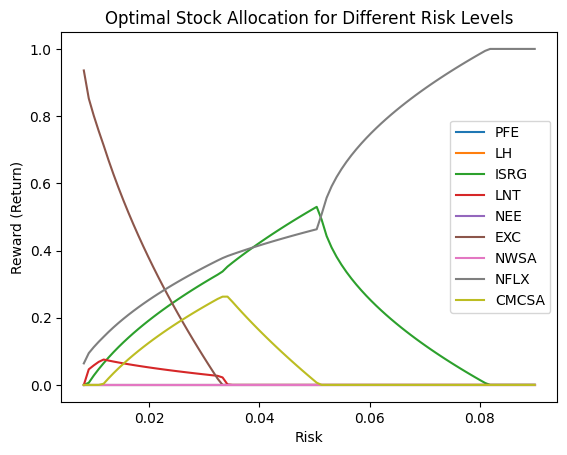

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
plt.figure(figsize=(12, 6))
param_analysis.columns = ["PFE","LH","ISRG","LNT","NEE","EXC","NWSA","NFLX","CMCSA"]
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

### 3.5 Efficient Frontier

In [ ]:
# Efficient Frontier Dictionary Reference
risk = list(returns.keys())
print(risk)
reward = list(returns.values())
print(reward)

[0.0081, 0.009, 0.009899999999999999, 0.0108, 0.0117, 0.0126, 0.0135, 0.0144, 0.0153, 0.0162, 0.0171, 0.018, 0.0189, 0.019799999999999998, 0.0207, 0.0216, 0.0225, 0.0234, 0.0243, 0.0252, 0.026099999999999998, 0.027, 0.027899999999999998, 0.0288, 0.0297, 0.0306, 0.0315, 0.0324, 0.033299999999999996, 0.0342, 0.0351, 0.036, 0.0369, 0.0378, 0.0387, 0.039599999999999996, 0.0405, 0.0414, 0.0423, 0.0432, 0.0441, 0.045, 0.045899999999999996, 0.0468, 0.0477, 0.0486, 0.049499999999999995, 0.0504, 0.0513, 0.052199999999999996, 0.0531, 0.054, 0.0549, 0.055799999999999995, 0.0567, 0.0576, 0.058499999999999996, 0.0594, 0.0603, 0.0612, 0.062099999999999995, 0.063, 0.0639, 0.0648, 0.0657, 0.06659999999999999, 0.0675, 0.0684, 0.0693, 0.0702, 0.0711, 0.072, 0.07289999999999999, 0.0738, 0.0747, 0.0756, 0.0765, 0.0774, 0.0783, 0.07919999999999999, 0.0801, 0.081, 0.0819, 0.0828, 0.0837, 0.0846, 0.08549999999999999, 0.0864, 0.0873, 0.0882, 0.0891, 0.09]
[1.1407378626441893, 1.1611169739867364, 1.17868711812

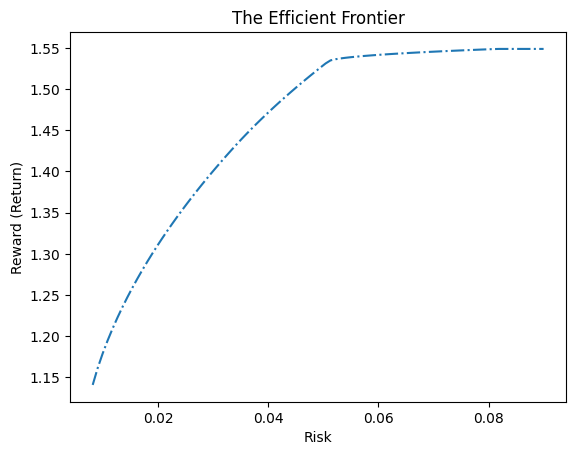

In [ ]:
# Plot for Efficient Frontier
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

## 3.6 Exactly 3 Stocks Extracted from MPT

So looking at Parameter Analysis, at a risk level of 0.04 or 4%, the three stocks MPT chooses are: ISRG, CMCSA, and NFLX

In [ ]:
# Creating a copy of param_analysis dataframe and dropping N/A
mpt = param_analysis.copy()
mpt.dropna(inplace = True)

In [ ]:
# Math to check index for given risk level of 4%
(0.04-0.0081)/(0.0009)

35.44444444444444

In [ ]:
# Sliced mpt df to check
mpt.iloc[36]

PFE      0.000000
LH       0.000000
ISRG     0.428505
LNT      0.000000
NEE      0.000000
EXC      0.000000
NWSA     0.000000
NFLX     0.417767
CMCSA    0.153728
Name: 0.0405, dtype: float64

In [ ]:
# Sliced mpt df and assigned to final mpt
mpt_final = mpt.iloc[36]
mpt_final = mpt_final.replace(0, np.nan).dropna()

In [ ]:
# Final allocation percentages at a risk level of 4%
mpt_final

ISRG     0.428505
NFLX     0.417767
CMCSA    0.153728
Name: 0.0405, dtype: float64

Therefore, as mentioned earlier, these are our 3 stocks from the MPT model, with the given allocations.

#4. Analysis

## 4.1 Buy & Hold for MPT portfolio

In [ ]:
# Function for Buy & Hold Strategy
def analyze_stocks_by_sector(mpt_stocks, start_date, end_date, short_term, long_term, initial_investment, allocation_pct):
  results = pd.DataFrame()
  portfolio_value = 0
  # Iterating through allocation list as well as the three stocks from MPT portfolio
  for i, ticker in enumerate(mpt_stocks):
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval = stock_interval)
            stock_data['Day'] = np.arange(1, len(stock_data) + 1)
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            # Defining Return
            stock_data['logClose'] = np.log(stock_data['Close'])
            stock_data['return'] = stock_data['logClose'].diff()
            stock_data.loc[stock_data.index[0], 'return'] = 0.0


            # Momentum trading
            stock_data['{}-day'.format(short_term)] = stock_data['Close'].rolling(short_term).mean().shift()
            stock_data['{}-day'.format(long_term)] = stock_data['Close'].rolling(long_term).mean().shift()
            stock_data.dropna(inplace=True)
            stock_data.loc[stock_data.index[0], 'return'] = 0.0
            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term)] > stock_data['{}-day'.format(long_term)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0
            stock_data['system_return'] = (stock_data['invested'] * stock_data['return'])
            stock_data['system_return_plt'] = np.exp(stock_data['system_return']).cumprod()

            # Buy and Hold Strategy
            buy_hold_return = np.exp(np.sum(stock_data['return'])) - 1
            stock_data['buy_hold'] = np.exp(stock_data['return']).cumprod()

            # Initial investment in each stock based on allocation
            initial_stock_price = stock_data.loc[stock_data.index[0], 'Open']
            allocated_investment = initial_investment * allocation_pct[i]
            shares_bought = allocated_investment / initial_stock_price
            stock_data[ticker] = shares_bought * stock_data['Open']

            # Append results
            results = pd.concat([results, stock_data[ticker]], axis=1)

  # Returning results dataframe to use later
  return results

# Defining sectors and stocks within each sector
mpt_stocks = ['ISRG','NFLX','CMCSA']

# Function Parameter for Buy and Hold Strategy
start_date = '2021-12-01'
end_date = '2022-12-31'
short_term = 8
long_term = 21
stock_interval = '1d'
initial_investment = 100000
allocation_pct = [mpt_final.iloc[0],mpt_final.iloc[1],mpt_final.iloc[2]]

buy_hold_results = analyze_stocks_by_sector(mpt_stocks, start_date, end_date, short_term, long_term, initial_investment, allocation_pct)



In [ ]:
# Creating Total Portfolio Column
buy_hold_results['total_portfolio'] = (buy_hold_results['ISRG'] + buy_hold_results['NFLX'] + buy_hold_results['CMCSA']).round(2)

In [ ]:
# Spot checking results
buy_hold_results.head()

ISRG          NFLX         CMCSA  total_portfolio
2021-12-31 00:00:00  42850.471112  41776.701827  15372.831100        100000.00
2022-01-03 00:00:00  42334.641805  41475.364955  15127.664452         98937.67
2022-01-04 00:00:00  42493.995007  41084.998065  15348.616597         98927.61
2022-01-05 00:00:00  41607.521903  40543.281398  15306.242371         97457.05
2022-01-06 00:00:00  40119.053418  37964.127870  15263.868145         93347.05

In [ ]:
buy_hold_results = buy_hold_results.reset_index().rename({'index':'Date'}, axis = 1) # Rename index to date column
buy_hold_results['Day'] = pd.to_datetime(buy_hold_results['Date']).dt.day # Creating Day column to slice df
# Using logical operations to get first day of each month stock market is open with values
buy_hold_results = buy_hold_results[(buy_hold_results['Day'] == 1) | (buy_hold_results['Date'] == '2022-10-03') | (buy_hold_results['Date'] == '2022-05-02')| (buy_hold_results['Date'] == '2022-01-03')].drop('Day', axis = 1)

In [ ]:
buy_hold_results

Date          ISRG          NFLX         CMCSA  total_portfolio
1   2022-01-03  42334.641805  41475.364955  15127.664452         98937.67
21  2022-02-01  33662.325513  29651.383053  14876.445332         78190.15
40  2022-03-01  34226.551192  26818.833180  13965.394857         75010.78
63  2022-04-01  35883.818006  25805.249891  14274.122844         75963.19
83  2022-05-02  28328.150264  13129.312076  12125.135339         53582.60
104 2022-06-01  26882.174045  13608.023463  13484.142576         53974.34
125 2022-07-01  23734.077465  12086.966143  11916.289291         47737.33
145 2022-08-01  26831.416392  15279.064742  11208.031239         53318.51
168 2022-09-01  24062.225393  15116.069459  10941.678632         50119.97
189 2022-10-03  22356.562208  16289.222513   9031.802995         47677.59
210 2022-11-01  29281.904590  20283.284115   9682.552757         59247.74
231 2022-12-01  31916.533145  20818.837358  11011.293596         63746.66

## 4.2 Momentum Trading Strategy (S&P 500 Index)

GSPC

In [ ]:
# Function for ^GSPC momentum trading strategy
def analyze_stocks_by_sector(stock, start_date, end_date, short_term, long_term, initial_investment):
    # For loop to get information for yahoo finance
    for ticker in stock:
            stock_data =si.get_data(ticker, start_date=start_date, end_date=end_date, interval = stock_interval)
            stock_data['Day'] = np.arange(1, len(stock_data) + 1)
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            # Defining Return
            stock_data['logClose'] = np.log(stock_data['Close'])
            stock_data['return'] = stock_data['logClose'].diff()
            stock_data.loc[stock_data.index[0], 'return'] = 0.0

            # Momentum trading
            stock_data['{}-day'.format(short_term)] = stock_data['Close'].rolling(short_term).mean().shift()
            stock_data['{}-day'.format(long_term)] = stock_data['Close'].rolling(long_term).mean().shift()
            stock_data.dropna(inplace=True)
            stock_data.loc[stock_data.index[0], 'return'] = 0.0
            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term)] > stock_data['{}-day'.format(long_term)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0
            stock_data['system_return'] =  (stock_data['invested'] * stock_data['return'])

            # Compounded initial investment
            stock_data['total_portfolio'] = initial_investment * (1 + stock_data['invested'] * stock_data['return']).cumprod()

            stock_data['system_return_plt'] = np.exp(stock_data['system_return']).cumprod()
            return stock_data[['system_return', 'total_portfolio']]

# Defining sectors and stocks within each sector
stock = ['^GSPC']

# Parameter for Function
start_date = '2021-12-01'
end_date = '2022-12-31'
short_term = 8
long_term = 21
initial_investment = 100000

gspc_mt = analyze_stocks_by_sector(stock, start_date, end_date, short_term, long_term, initial_investment)

In [ ]:
gspc_mt.head() # Spot checking table

system_return  total_portfolio
2021-12-31       0.000000    100000.000000
2022-01-03       0.006354    100635.382417
2022-01-04      -0.000630    100572.000215
2022-01-05      -0.019583     98602.472153
2022-01-06      -0.000964     98507.396323

In [ ]:
gspc_mt = gspc_mt.reset_index().rename({'index':'Date'}, axis = 1) # Renaming index to Date
gspc_mt['Day'] = pd.to_datetime(gspc_mt['Date']).dt.day # Creating day column to slice df
# Using logical operations to get first day of each month stock market is open with values
gspc_mt = gspc_mt[(gspc_mt['Day'] == 1) | (gspc_mt['Date'] == '2022-10-03') | (gspc_mt['Date'] == '2022-05-02')| (gspc_mt['Date'] == '2022-01-03')].drop('Day', axis = 1)

In [ ]:
gspc_mt

Date  system_return  total_portfolio
1   2022-01-03       0.006354    100635.382417
21  2022-02-01       0.000000     97715.354159
40  2022-03-01      -0.000000     92570.185589
63  2022-04-01       0.003404     94279.851474
83  2022-05-02       0.000000     92185.342622
104 2022-06-01      -0.000000     92185.342622
125 2022-07-01       0.000000     82296.700909
145 2022-08-01      -0.002827     86803.681142
168 2022-09-01       0.000000     84812.250016
189 2022-10-03       0.000000     84812.250016
210 2022-11-01      -0.004110     86081.330405
231 2022-12-01      -0.000868     90727.796027

## 4.3 Buy & Hold Strategy (S&P 500 Index)

In [ ]:
# Function for buy and hold strategy on ^GSPC
def analyze_stocks_by_sector(mpt_stocks, start_date, end_date, short_term, long_term, initial_investment):
  # df to store buy and hold strategy
  results = pd.DataFrame()
  for i, ticker in enumerate(mpt_stocks):
            stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval = stock_interval)
            stock_data['Day'] = np.arange(1, len(stock_data) + 1)
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            # Defining Return
            stock_data['logClose'] = np.log(stock_data['Close'])
            stock_data['return'] = stock_data['logClose'].diff()
            stock_data.loc[stock_data.index[0], 'return'] = 0.0

            # Momentum trading
            stock_data['{}-day'.format(short_term)] = stock_data['Close'].rolling(short_term).mean().shift()
            stock_data['{}-day'.format(long_term)] = stock_data['Close'].rolling(long_term).mean().shift()
            stock_data.dropna(inplace=True)
            stock_data.loc[stock_data.index[0], 'return'] = 0.0
            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term)] > stock_data['{}-day'.format(long_term)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0
            stock_data['system_return'] = (stock_data['invested'] * stock_data['return'])
            stock_data['system_return_plt'] = np.exp(stock_data['system_return']).cumprod()

            # Buy and Hold Strategy
            buy_hold_return = np.exp(np.sum(stock_data['return'])) - 1
            stock_data['buy_hold'] = np.exp(stock_data['return']).cumprod()

            # Initial investment in each stock based on allocation
            initial_stock_price = stock_data.loc[stock_data.index[0], 'Open']
            shares_bought = initial_investment / initial_stock_price
            stock_data[ticker] = shares_bought * stock_data['Open']

            # Append results
            results = pd.concat([results, stock_data[ticker]], axis=1)

  # Returning results dataframe to use later
  return results

# Defining sectors and stocks within each sector
mpt_stocks = ['^GSPC']

# Function parameters for buy and hold strategy
start_date = '2021-12-01'
end_date = '2022-12-31'
short_term = 8
long_term = 21
stock_interval = '1d'
initial_investment = 100000

buy_hold_gspc = analyze_stocks_by_sector(mpt_stocks, start_date, end_date, short_term, long_term, initial_investment)



In [ ]:
buy_hold_gspc.head() # Spot checking df

^GSPC
2021-12-31 00:00:00  100000.000000
2022-01-03 00:00:00  100061.362240
2022-01-04 00:00:00  100613.581495
2022-01-05 00:00:00  100267.637937
2022-01-06 00:00:00   98286.571169

In [ ]:
buy_hold_gspc = buy_hold_gspc.reset_index().rename({'index':'Date', '^GSPC':'total_portfolio'}, axis = 1) # Renaming index to Date and renaming total_portfolio
buy_hold_gspc['Day'] = pd.to_datetime(buy_hold_gspc['Date']).dt.day # Creating day column to slice df
# Using logical operations to get first day of each month stock market is open with values
buy_hold_gspc = buy_hold_gspc[(buy_hold_gspc['Day'] == 1) | (buy_hold_gspc['Date'] == '2022-10-03') | (buy_hold_gspc['Date'] == '2022-05-02')| (buy_hold_gspc['Date'] == '2022-01-03')].drop('Day', axis = 1)

In [ ]:
buy_hold_gspc

Date  total_portfolio
1   2022-01-03    100061.362240
21  2022-02-01     94646.515257
40  2022-03-01     91370.644902
63  2022-04-01     95081.051124
83  2022-05-02     86501.115073
104 2022-06-01     86902.561753
125 2022-07-01     79179.764470
145 2022-08-01     86119.352164
168 2022-09-01     82440.981919
189 2022-10-03     75594.163583
210 2022-11-01     81709.287570
231 2022-12-01     85590.789222

## 4.4 Performance Plot of Three Strategies





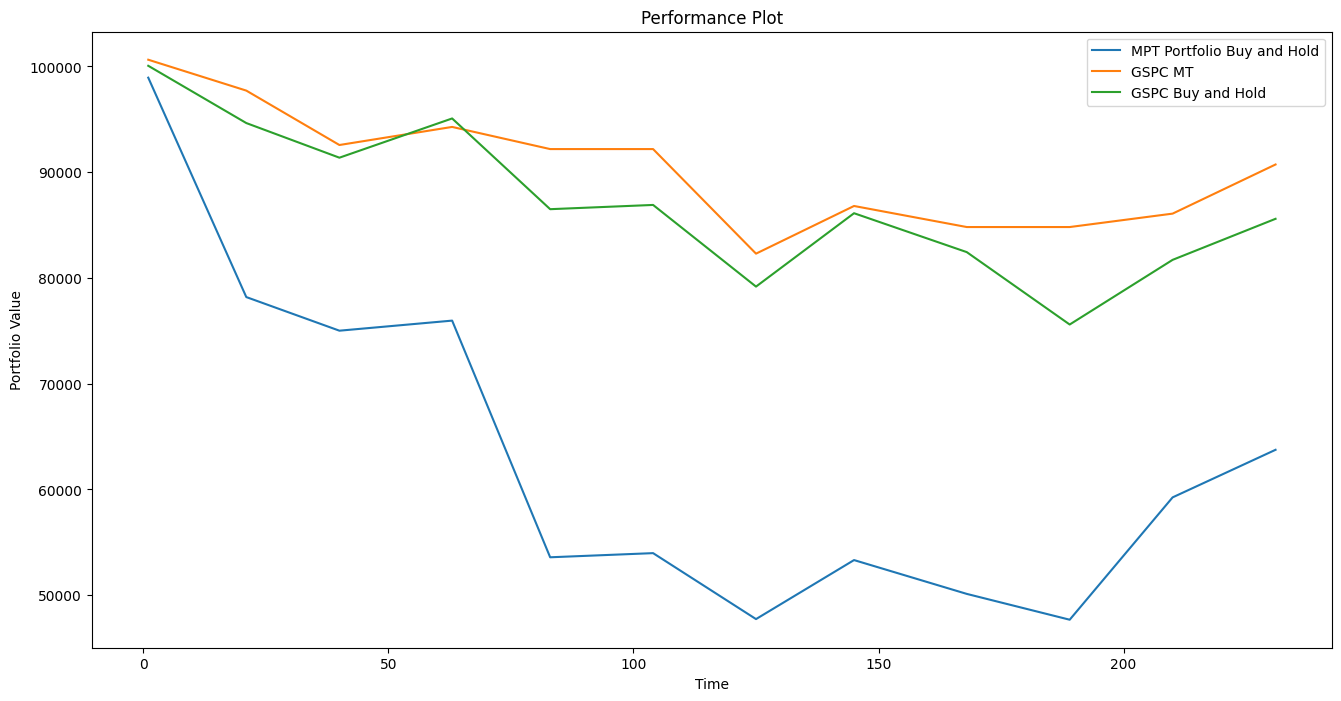

In [ ]:
# Plot of three strategies
plt.figure(figsize=(16, 8))
plt.title('Performance Plot')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.plot(buy_hold_results['total_portfolio'], label = 'MPT Portfolio Buy and Hold')
plt.plot(gspc_mt['total_portfolio'], label = 'GSPC MT')
plt.plot(buy_hold_gspc['total_portfolio'], label = 'GSPC Buy and Hold')
plt.legend()
plt.show()

# 5. Conclusion

**Momentum Trading Analysis**

*   The application of the 8-21 Momentum Trading Strategy showcased diverse performance among stocks within each sector, illustrating the significance of individual stock dynamics in momentum trading. It depicted the dynamic changes in investment values over time, offering valuable insights into the identification of the top-performing trio of stocks within each sector.

*  Each sector displayed distinct momentum trends, indicating that momentum trading effectiveness varied significantly across sectors. This emphasizes the importance of sector selection in implementing momentum strategies.






**Modern Portfolio Theory**

*   Modern Portfolio Theory  reiterated the pivotal role of diversification in mitigating risks while striving for optimized returns. It vividly showcased how a carefully balanced portfolio, accounting for varying asset correlations and risk tolerance, can significantly impact overall performance. It also emphasized the nuanced art of portfolio construction.


*   MPT's depiction of the efficient frontier vividly showcased the inherent trade-off between risk and return. The nuanced balance required in optimizing portfolios across various risk levels became evident, demonstrating the intricacies involved in decision-making for risk-averse versus risk-seeking investors.

**Investment Strategy Evaluation**

Upon analyzing the outcomes from 'MPT Portfolio Buy and Hold', 'GSPC MT', and 'GSPC Buy and Hold', notable insights surfaced. By investing $100,000, the returns from the three different methods of investment are summarized as below.

        *  MPT Portfolio Buy and Hold - $63,746.66
        *  GSPC  Buy and Hold - $85,590.79
        *  GSPC Momentum Trading - $90,727.80

*  Contrary to initial expectations, the performance hierarchy indicated 'MPT Portfolio Buy and Hold' as the least performing, followed by 'GSPC Buy and Hold', with 'GSPC MT' emerging as the most successful. This deviation from anticipated results was intriguing, considering the conventional belief favoring buy-and-hold strategies over momentum trading.

*   The observed pattern aligns with the nature of Momentum trading, emphasizing short-term trends, facilitating frequent transactions, and potentially yielding higher returns amid volatile market conditions.

* Conversely, buy-and-hold strategies prioritize long-term stability, ensuring enduring positions but potentially yielding lower returns, particularly during market fluctuations.